In [6]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openai
from numpy import nan
import re
import missingno as msno

%matplotlib inline

In [2]:
dsscdb = pd.read_csv("DBVersions/clarke_DSSCDB.csv", index_col=0)
dsscdb

,VOC,JSC,FF,PCE,Electrolyte,Molecule SMILE,Exposure time (h),Cosensitization time (h),Solar simulator at 1.5G (mW/cm2),Dye loading (nmol/cm2),Semiconductor Type,Semiconductor Film Thickness (um),Semiconductor Scattering Layer Thickness (um),Semiconductor Film Particle Size (nm),Semiconductor Scattering Layer Particle Size (nm),Used Co-sensitizer,Used Co-adsorbent,Co-adsorbent type,Co-adsorbent Conc. (mM),Active area (cm2)
0,687.0,10.79,0.70,5.19,Iodide_Triiodide,N#C/C(=C\c1ccc(cc1)N(c1ccccc1)CCCCCCN1c2ccccc2...,15.0,NaN,100.0,NaN,TiO2,NaN,NaN,20.0,NaN,0,0,NaN,NaN,NaN
1,790.0,6.90,0.47,2.60,Spiro-OMeTAD,N#C/C(=C\c1ccc(s1)c1ccc(s1)c1ccc(cc1)N(c1ccc(c...,5.0,NaN,100.0,NaN,TiO2,8.0,5.0,NaN,NaN,0,0,NaN,NaN,0.158
2,835.0,7.70,0.49,3.10,Spiro-OMeTAD,N#C/C(=C\c1ccc(s1)c1ccc(cc1)N(c1ccc(cc1)/C=C/c...,5.0,NaN,100.0,NaN,TiO2,8.0,5.0,NaN,NaN,0,0,NaN,NaN,0.158
3,800.0,6.40,0.43,2.20,Spiro-OMeTAD,CCN(c1ccc2c(c1)oc(=O)c(c2)/C=C/c1ccc(cc1)N(c1c...,5.0,NaN,100.0,NaN,TiO2,8.0,5.0,NaN,NaN,0,0,NaN,NaN,0.158
4,651.0,10.30,0.75,5.00,Iodide_Triiodide,N#C/C(=C\c1ccc(s1)c1ccc(s1)c1ccc(cc1)N(c1ccc(c...,5.0,NaN,100.0,NaN,TiO2,8.0,5.0,NaN,NaN,0,0,NaN,NaN,0.158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,666.0,17.84,0.74,8.79,Iodide_Triiodide,S=C=N[Ru]12(N=C=S)(N3CCC(CC3C3N2CCC(C3)C(=O)[O...,24.0,NaN,100.0,NaN,TiO2,14.0,NaN,NaN,NaN,0,0,NaN,NaN,0.120
4422,651.0,9.93,0.70,4.52,Iodide_Triiodide,C(#N)/C(/C(=O)O)=C\C=1SC(=CC1)C=1C=CC=2N(C3=CC...,24.0,NaN,100.0,296.0,TiO2,14.0,NaN,NaN,NaN,0,0,NaN,NaN,0.120
4423,667.0,12.85,0.71,6.09,Iodide_Triiodide,CSC1=CC=C(C=C1)C=1C=C2SC=3C=C(C=CC3N(C2=CC1)CC...,24.0,NaN,100.0,224.0,TiO2,14.0,NaN,NaN,NaN,0,0,NaN,NaN,0.120
4424,659.0,12.46,0.69,5.65,Iodide_Triiodide,COC1=CC=C(C=C1)C=1C=C2SC=3C=C(C=CC3N(C2=CC1)CC...,24.0,NaN,100.0,187.0,TiO2,14.0,NaN,NaN,NaN,0,0,NaN,NaN,0.120


In [3]:
dsscdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4426 entries, 0 to 4425
Data columns (total 20 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VOC                                                4426 non-null   float64
 1   JSC                                                4426 non-null   float64
 2   FF                                                 4426 non-null   float64
 3   PCE                                                4426 non-null   float64
 4   Electrolyte                                        4414 non-null   object 
 5   Molecule SMILE                                     4426 non-null   object 
 6   Exposure time (h)                                  3037 non-null   float64
 7   Cosensitization time (h)                           20 non-null     float64
 8   Solar simulator at 1.5G (mW/cm2)                   4212 non-null   float64
 9   Dye load

C:\Users\clarkep\AppData\Local\Temp\ipykernel_42208\1561770812.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=dsscdb.corr(), annot=False, mask= np.triu(np.ones_like(dsscdb.corr(), dtype=bool)))


<Axes: >

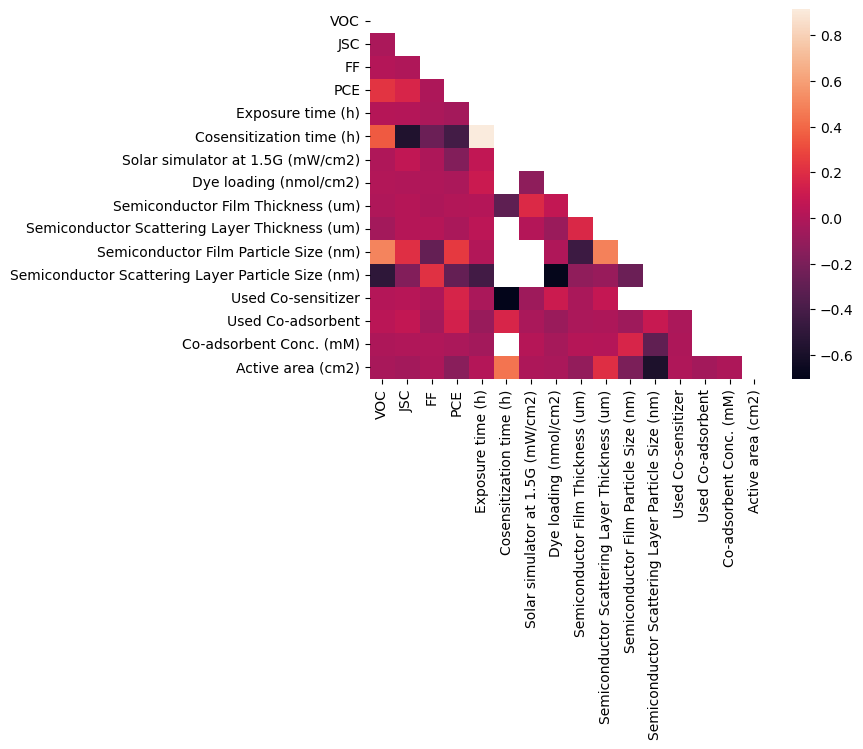

In [4]:
sns.heatmap(data=dsscdb.corr(), annot=False, mask= np.triu(np.ones_like(dsscdb.corr(), dtype=bool)))

In [5]:
dsscdb.columns

Index(['VOC', 'JSC', 'FF', 'PCE', 'Electrolyte', 'Molecule SMILE',
       'Exposure time (h)', 'Cosensitization time (h)',
       'Solar simulator at 1.5G (mW/cm2)', 'Dye loading (nmol/cm2)',
       'Semiconductor Type', 'Semiconductor Film Thickness (um)',
       'Semiconductor Scattering Layer Thickness (um)',
       'Semiconductor Film Particle Size (nm)',
       'Semiconductor Scattering Layer Particle Size (nm)',
       'Used Co-sensitizer', 'Used Co-adsorbent', 'Co-adsorbent type',
       'Co-adsorbent Conc. (mM)', 'Active area (cm2)'],
      dtype='object')

<Axes: xlabel='Cosensitization time (h)', ylabel='VOC'>

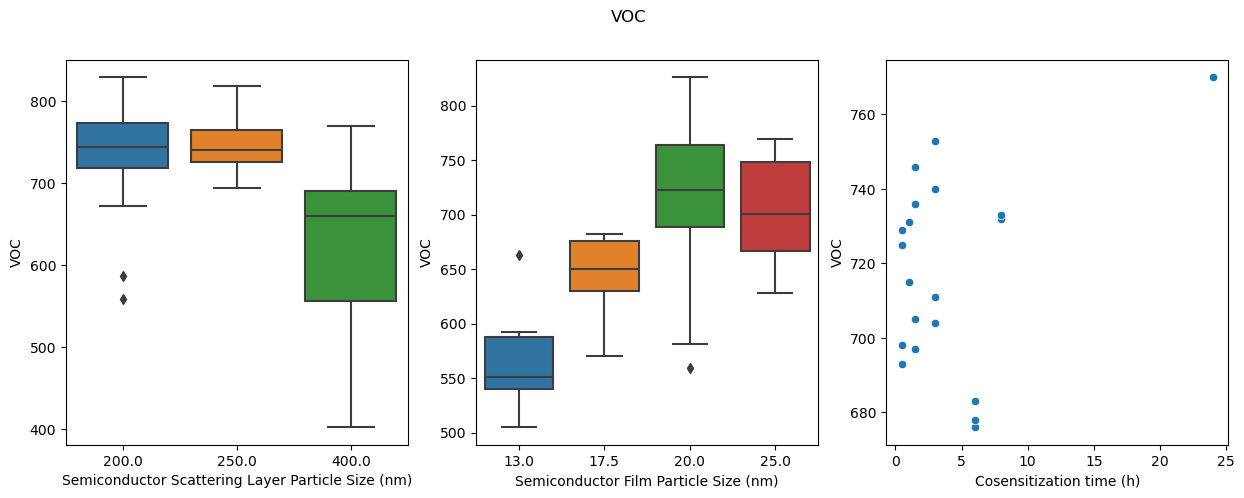

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("VOC")
sns.boxplot(ax=axes[0],data=dsscdb, x="Semiconductor Scattering Layer Particle Size (nm)", y="VOC")
sns.boxplot(ax=axes[1], data=dsscdb, x="Semiconductor Film Particle Size (nm)", y="VOC")
sns.scatterplot(ax=axes[2], data=dsscdb, x="Cosensitization time (h)", y="VOC")
# axes[2].set(
#     xlim=(0,5)
# )

<Axes: xlabel='Cosensitization time (h)', ylabel='JSC'>

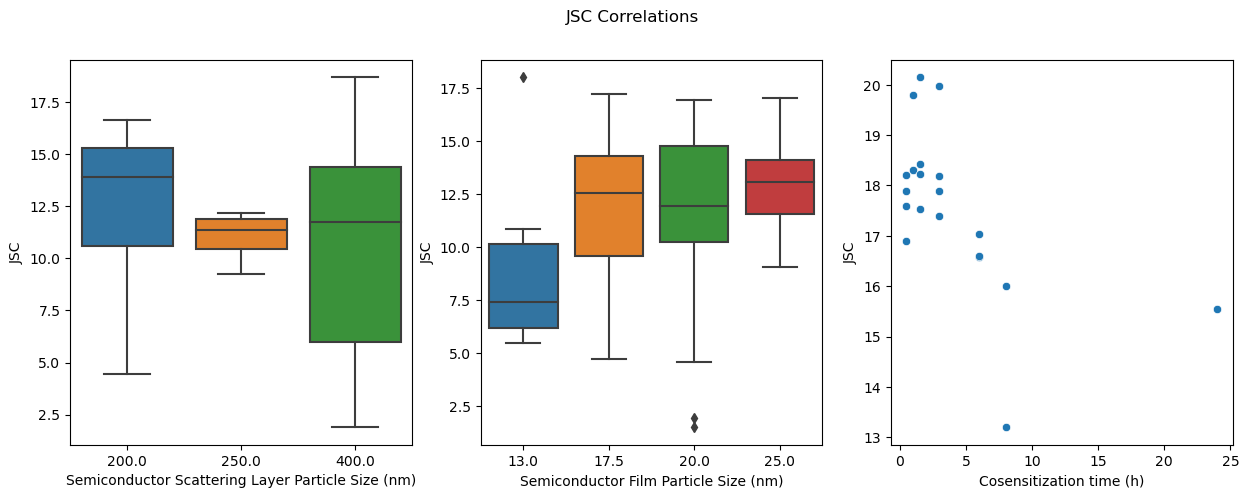

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("JSC Correlations")
sns.boxplot(ax=axes[0],data=dsscdb, x="Semiconductor Scattering Layer Particle Size (nm)", y="JSC")
sns.boxplot(ax=axes[1], data=dsscdb, x="Semiconductor Film Particle Size (nm)", y="JSC")
sns.scatterplot(ax=axes[2], data=dsscdb, x="Cosensitization time (h)", y="JSC")


<Axes: xlabel='Semiconductor Scattering Layer Particle Size (nm)', ylabel='Active area (cm2)'>

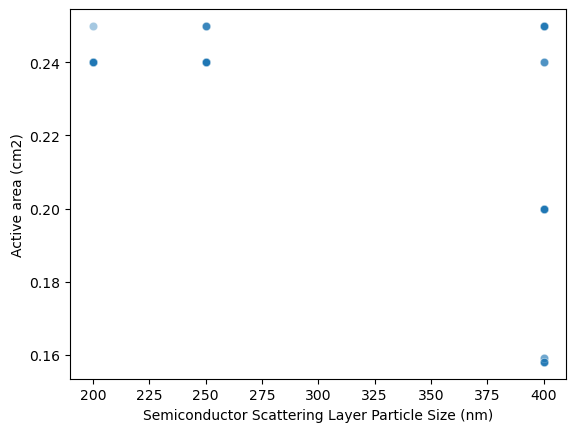

In [8]:
sns.scatterplot(data=dsscdb, x="Semiconductor Scattering Layer Particle Size (nm)", y="Active area (cm2)", alpha=0.4)

<Axes: >

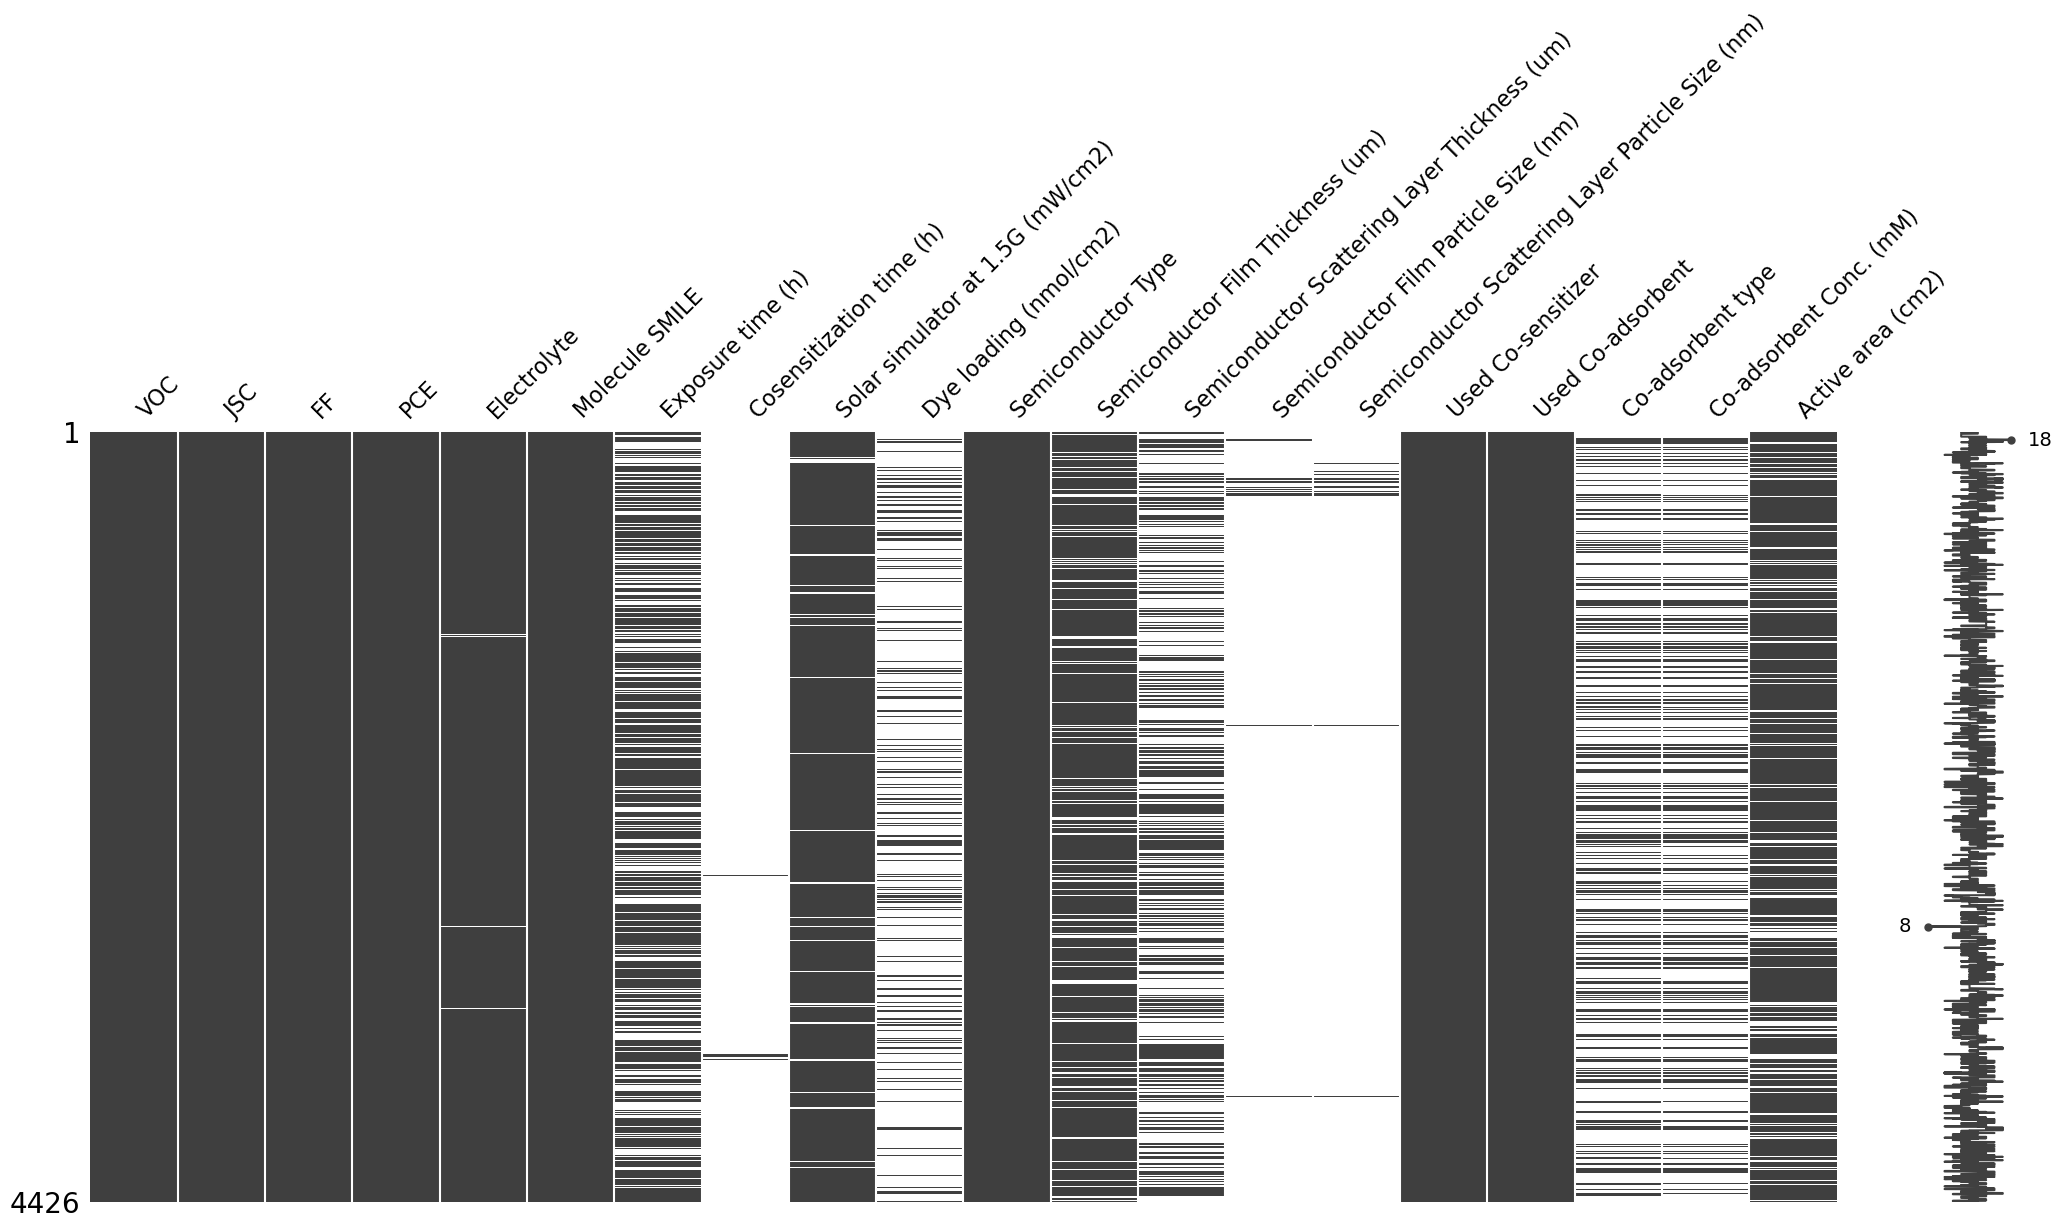

In [9]:
msno.matrix(dsscdb)

<Axes: >

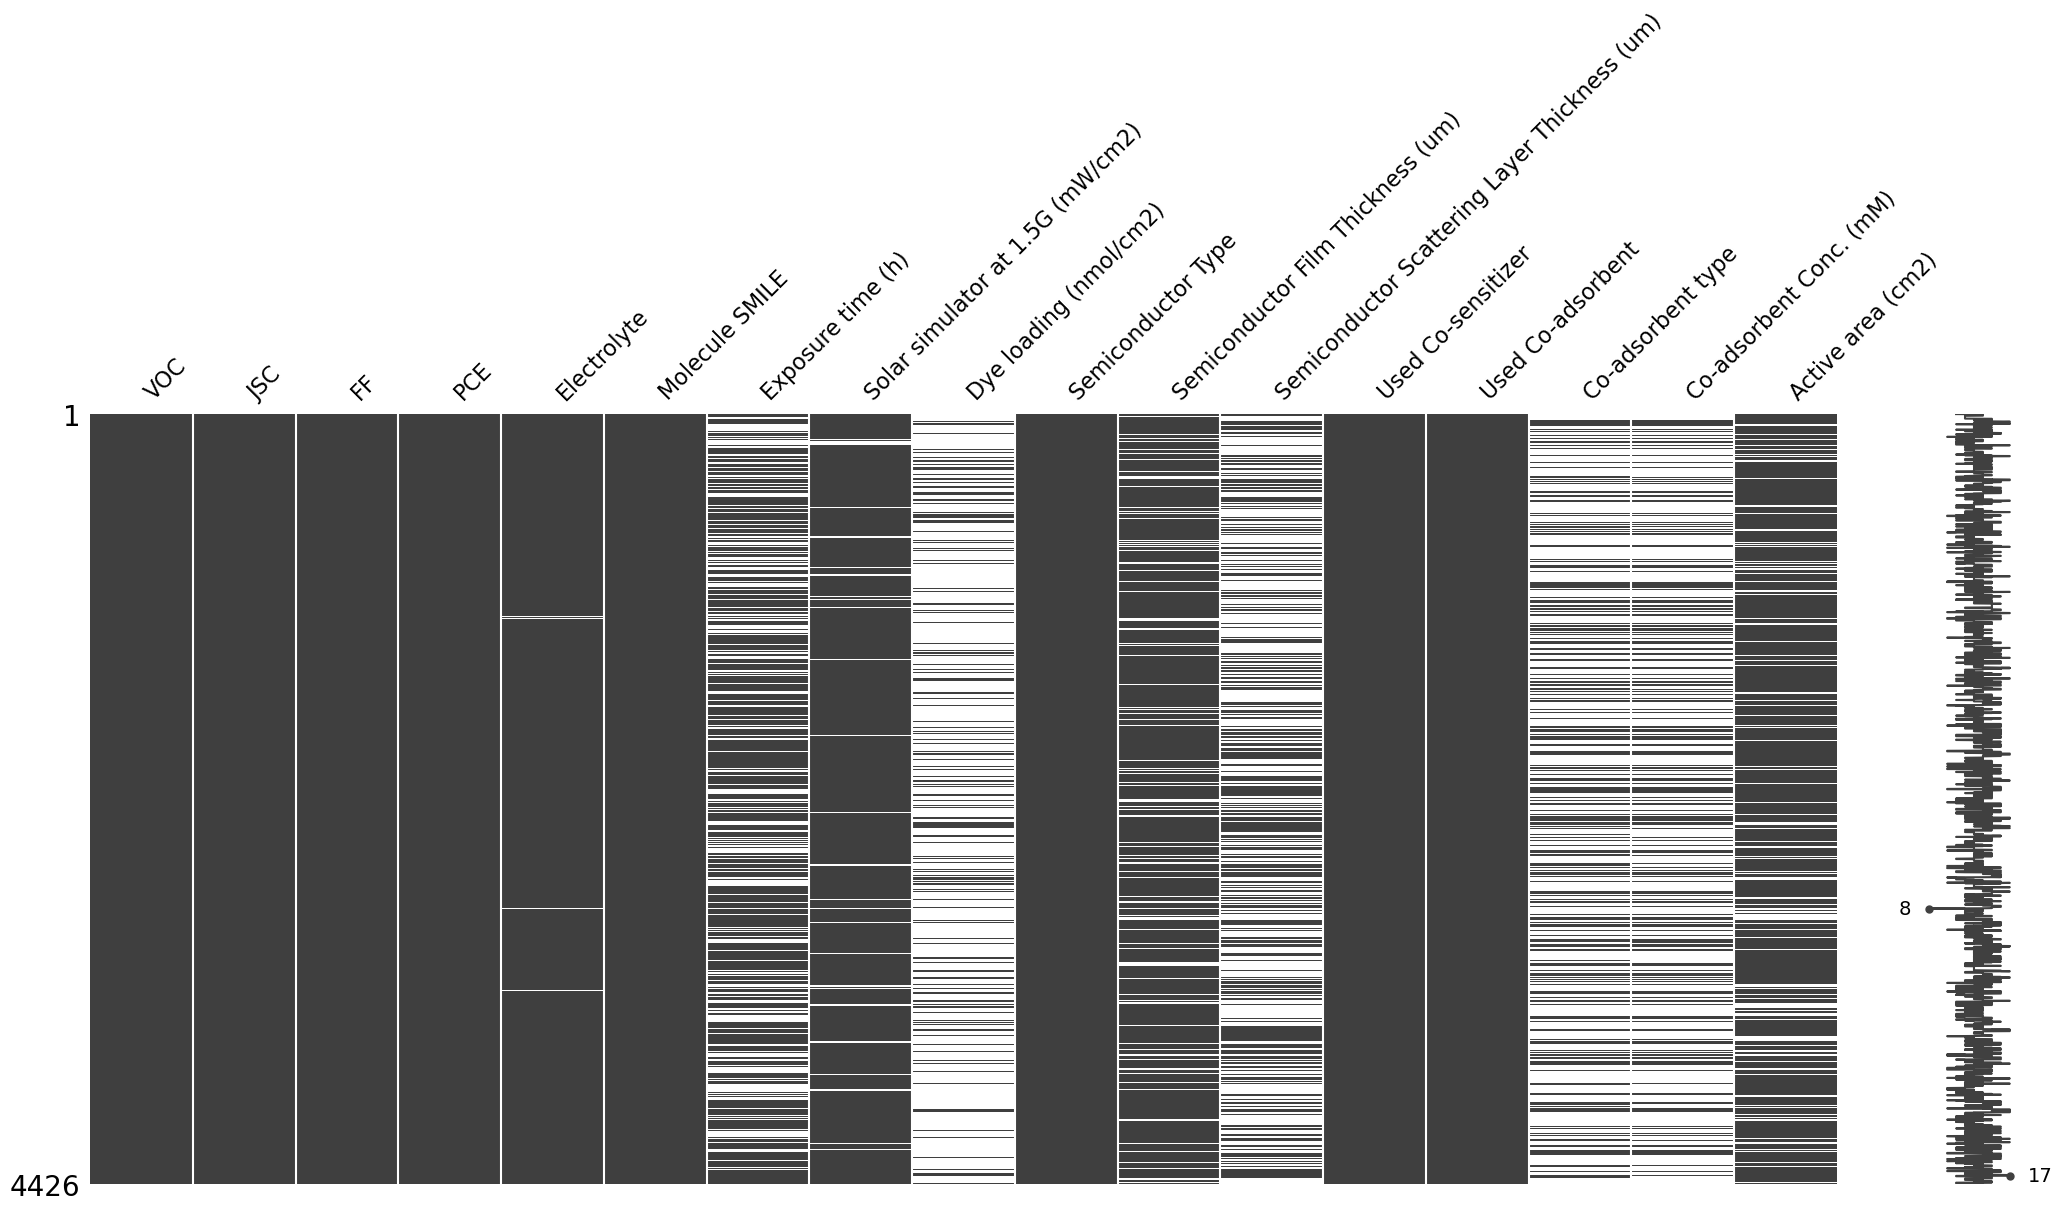

In [10]:
dsscdb = dsscdb.drop(["Cosensitization time (h)", "Semiconductor Film Particle Size (nm)", "Semiconductor Scattering Layer Particle Size (nm)"], axis='columns')
msno.matrix(dsscdb)

In [11]:
dsscdb["Electrolyte"].mode()

0    Iodide_Triiodide
Name: Electrolyte, dtype: object

<Axes: >

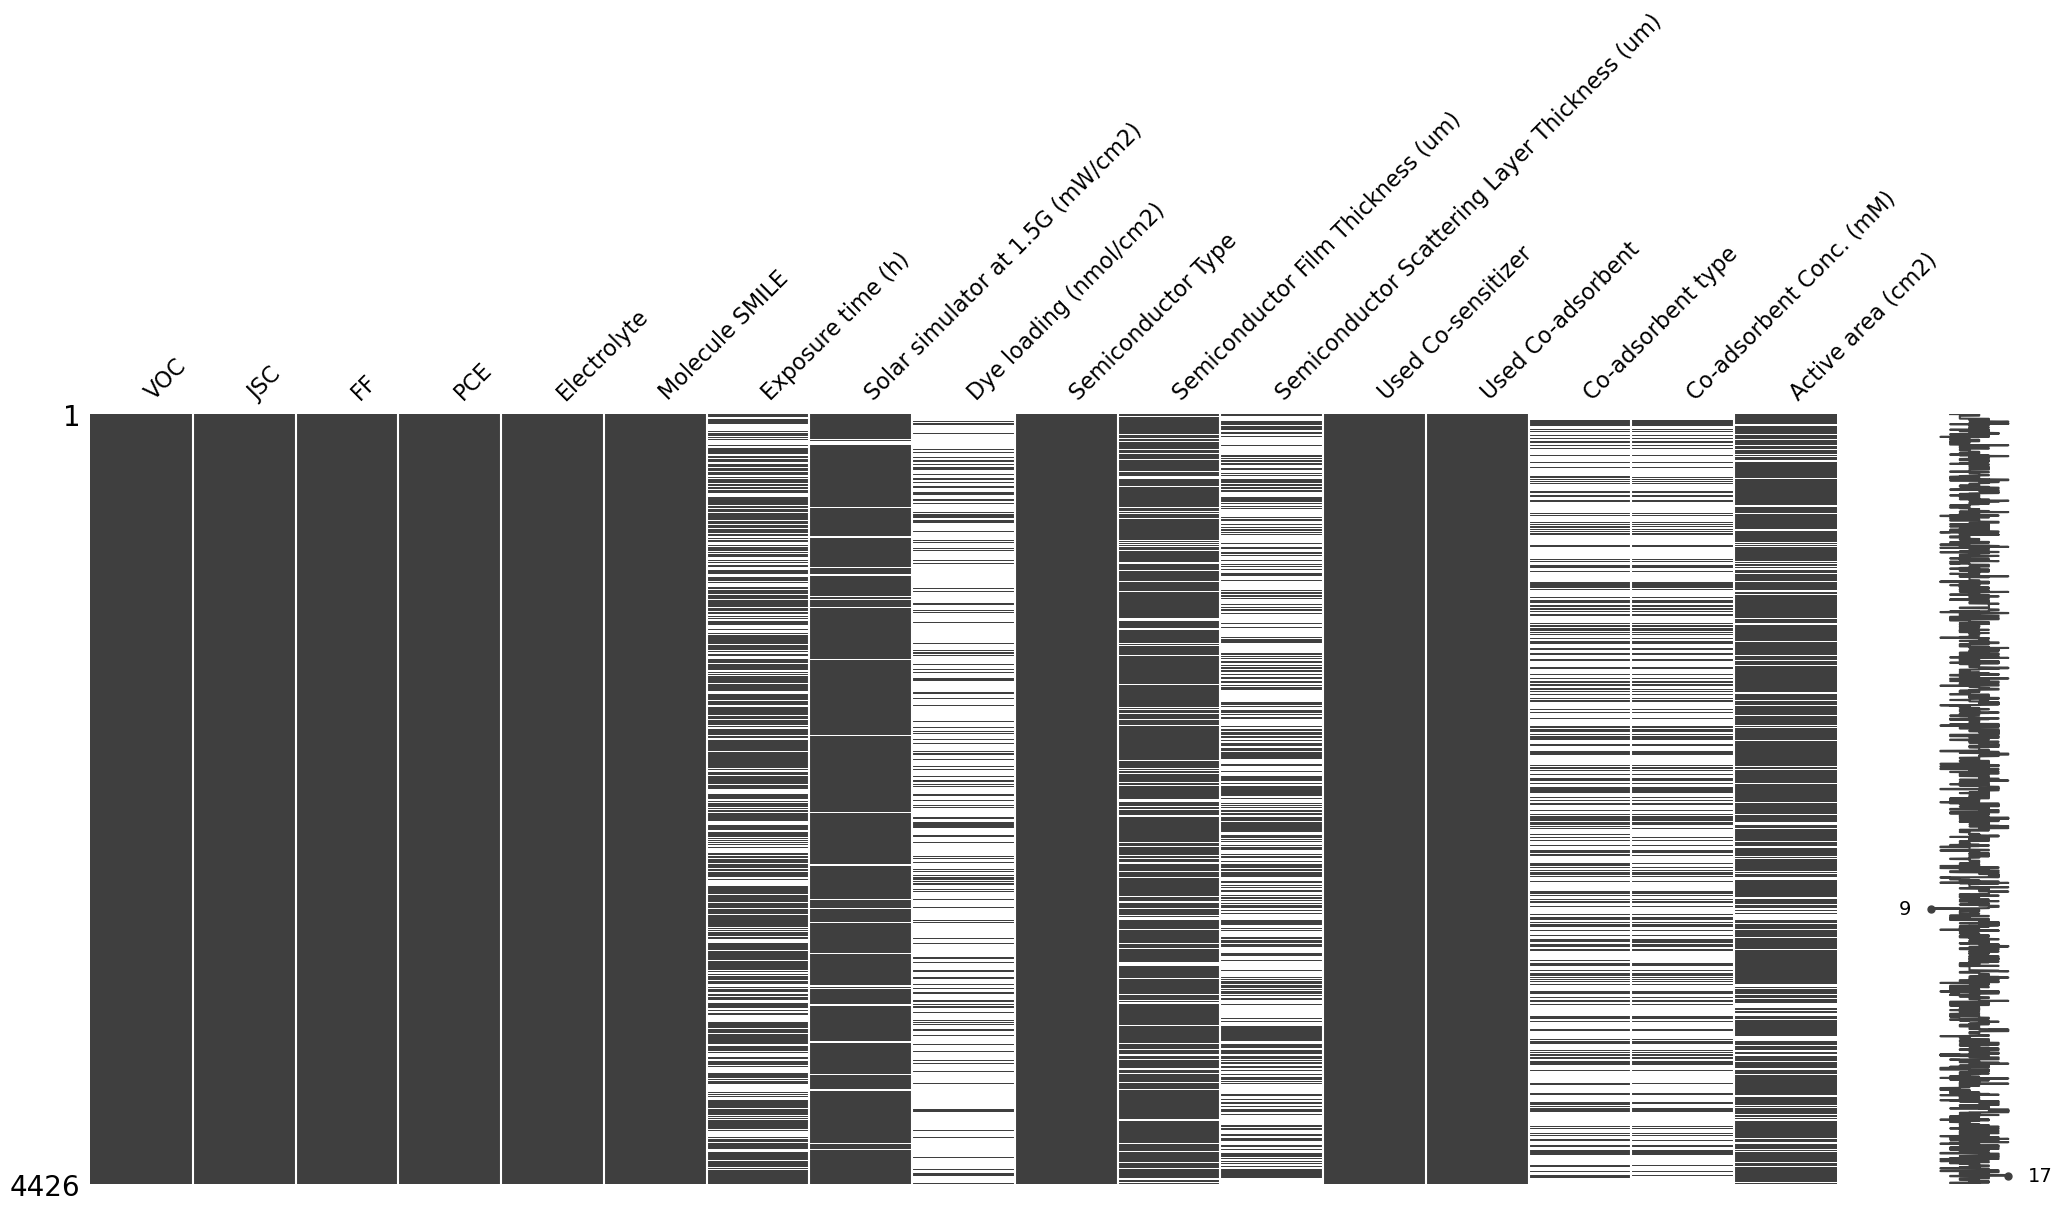

In [12]:
dsscdb["Electrolyte"].fillna(dsscdb["Electrolyte"].mode()[0], inplace=True)
msno.matrix(dsscdb)

In [13]:
dsscdb.groupby(['Exposure time (h)']).count().sort_values(by='PCE', ascending=False).head(5)

,VOC,JSC,FF,PCE,Electrolyte,Molecule SMILE,Solar simulator at 1.5G (mW/cm2),Dye loading (nmol/cm2),Semiconductor Type,Semiconductor Film Thickness (um),Semiconductor Scattering Layer Thickness (um),Used Co-sensitizer,Used Co-adsorbent,Co-adsorbent type,Co-adsorbent Conc. (mM),Active area (cm2)
Exposure time (h),,,,,,,,,,,,,,,,
12.0,947,947,947,947,947,947,921,231,947,886,438,947,947,307,304,844
24.0,585,585,585,585,585,585,570,107,585,500,292,585,585,108,96,488
16.0,230,230,230,230,230,230,224,70,230,186,143,230,230,33,31,207
18.0,156,156,156,156,156,156,138,38,156,144,81,156,156,55,48,128
2.0,107,107,107,107,107,107,95,25,107,105,58,107,107,33,21,95


<Axes: >

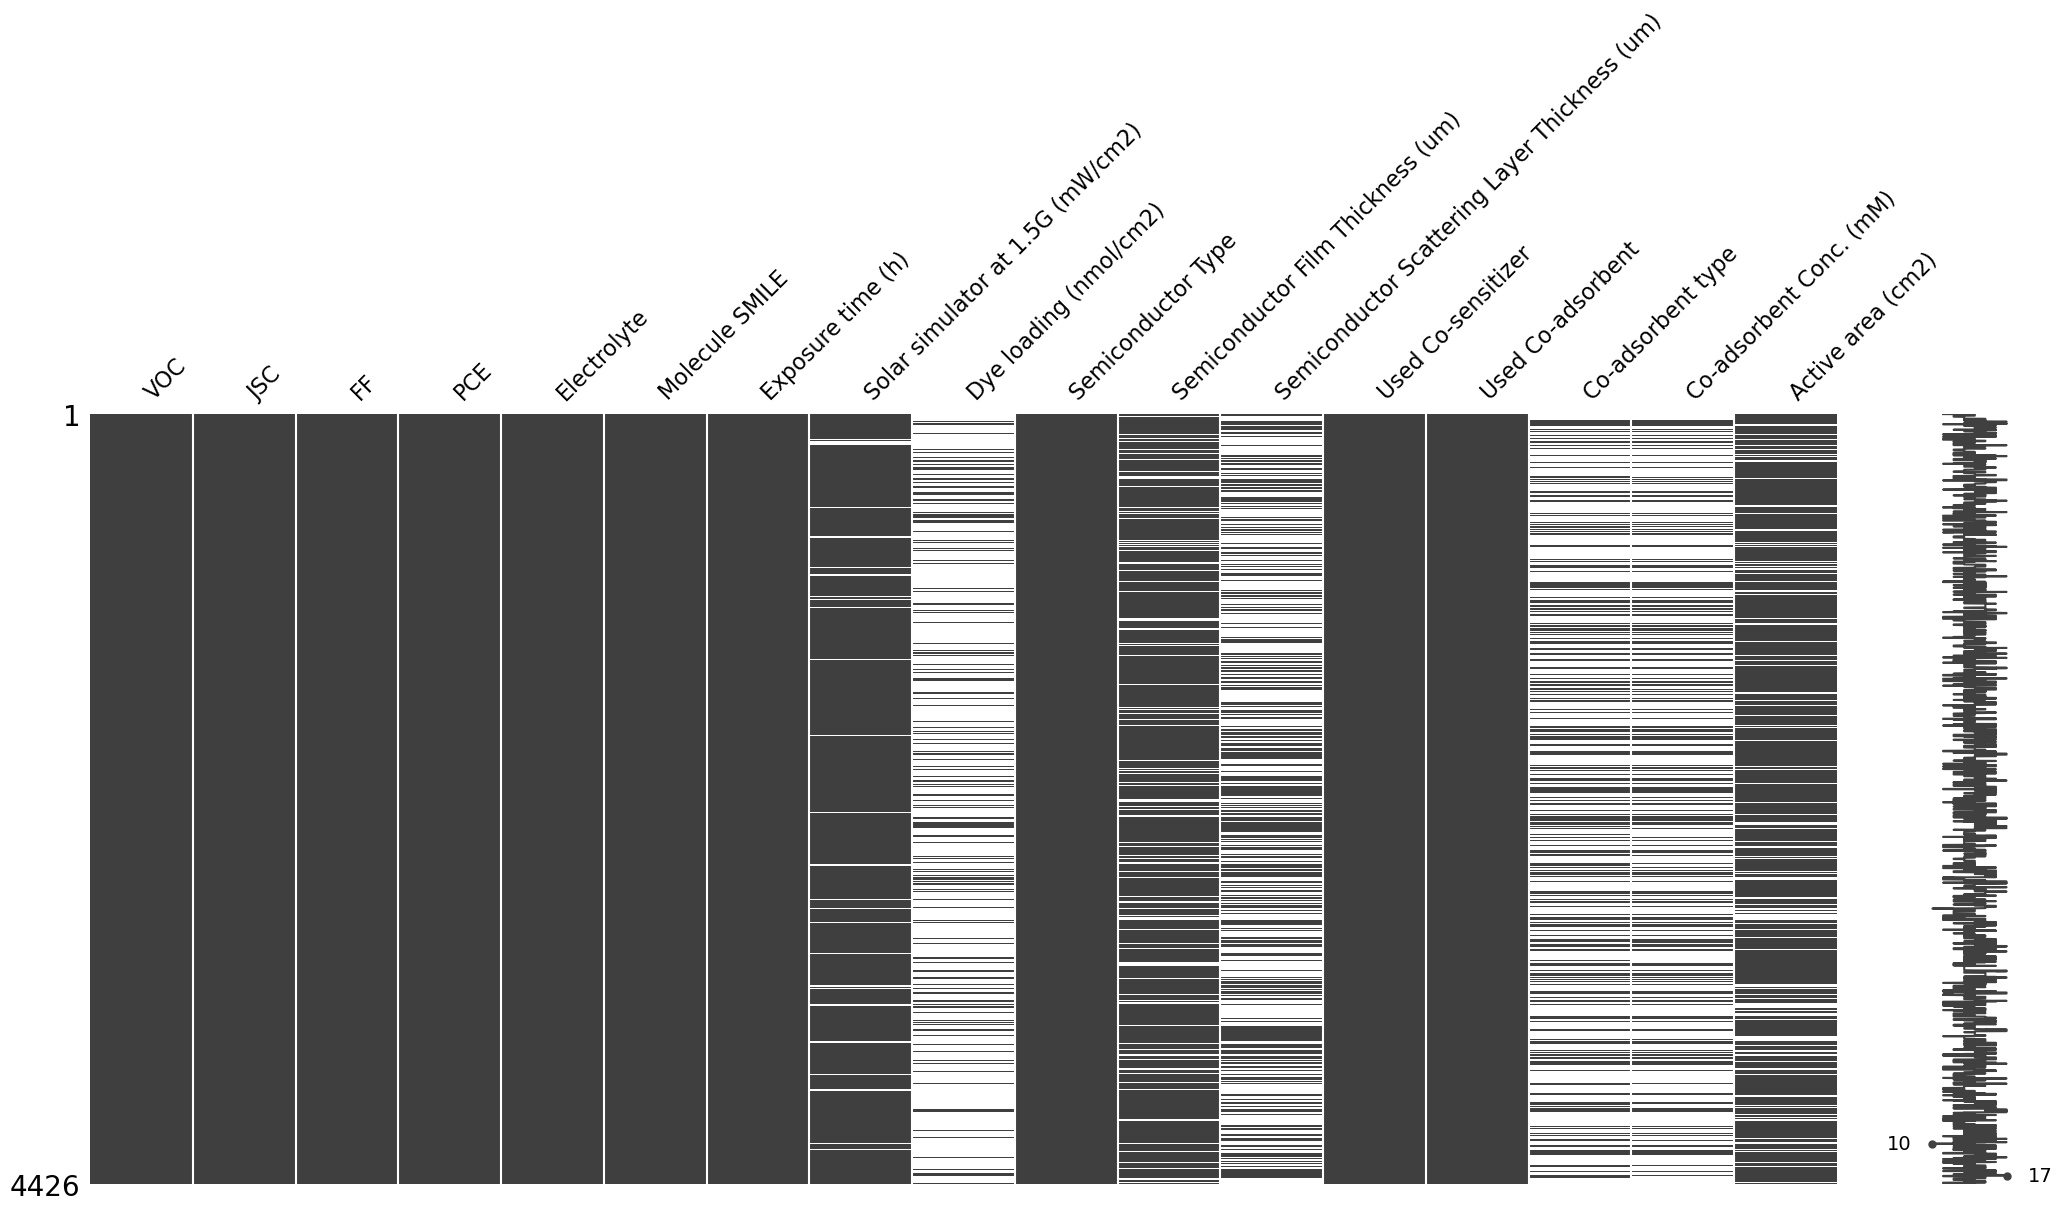

In [14]:
dsscdb["Exposure time (h)"].fillna(dsscdb["Exposure time (h)"].mode()[0], inplace=True)
msno.matrix(dsscdb)

<Axes: >

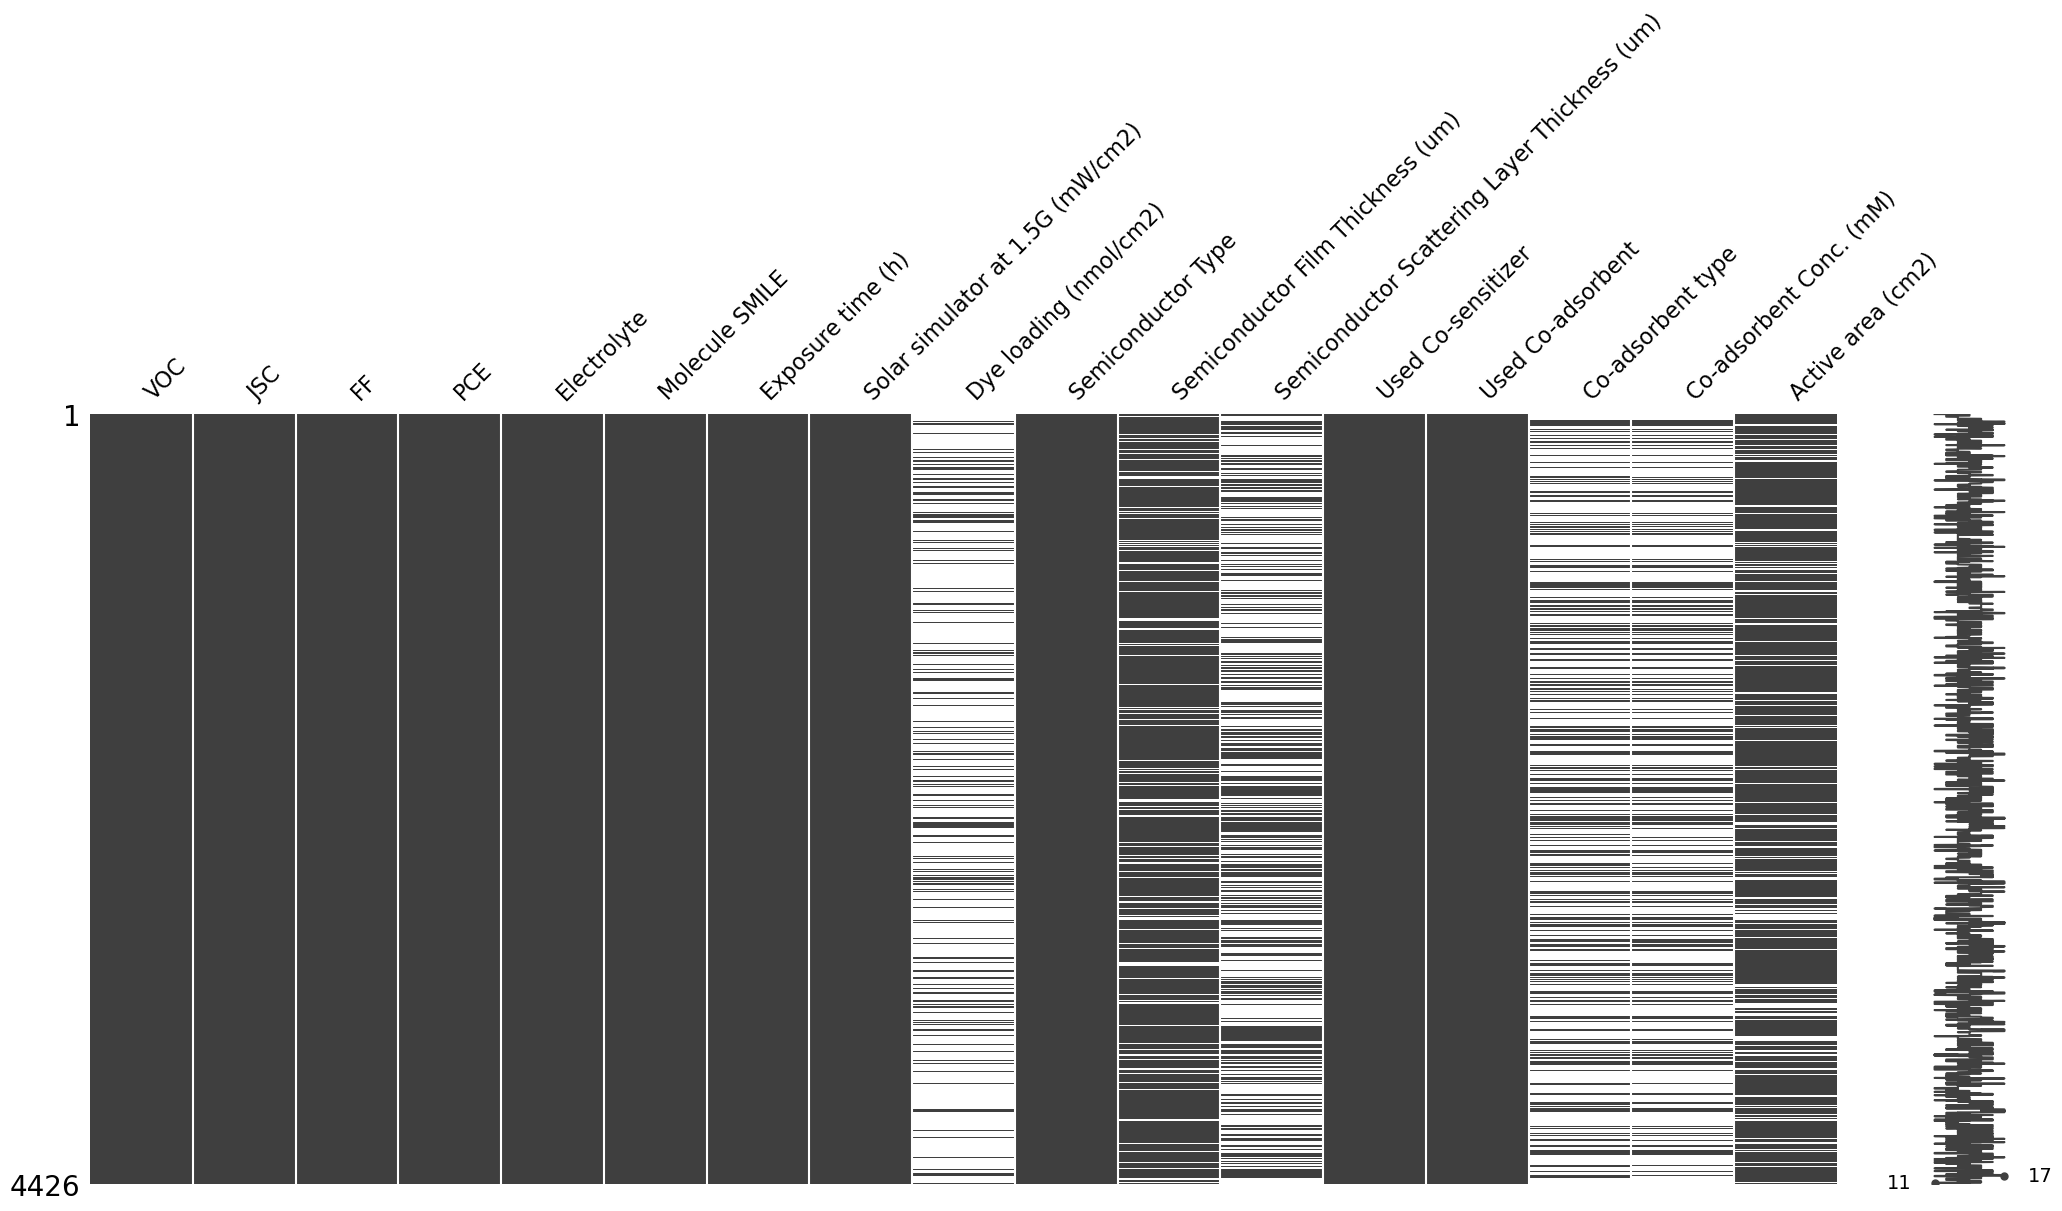

In [15]:
# "Solar simulator at 1.5G (mW/cm2)"
dsscdb["Solar simulator at 1.5G (mW/cm2)"].fillna(dsscdb["Solar simulator at 1.5G (mW/cm2)"].mode()[0], inplace=True)
msno.matrix(dsscdb)


In [16]:
dsscdb.loc[dsscdb["Dye loading (nmol/cm2)"] == 40000.0]

,VOC,JSC,FF,PCE,Electrolyte,Molecule SMILE,Exposure time (h),Solar simulator at 1.5G (mW/cm2),Dye loading (nmol/cm2),Semiconductor Type,Semiconductor Film Thickness (um),Semiconductor Scattering Layer Thickness (um),Used Co-sensitizer,Used Co-adsorbent,Co-adsorbent type,Co-adsorbent Conc. (mM),Active area (cm2)
935,590.0,15.3,0.44,4.7,Iodide_Triiodide,CCCCCCn1c2ccc(cc2c2c1ccc(c2)/C=C(/c1ccc(s1)C=C...,24.0,85.0,40000.0,TiO2,NaN,NaN,0,0,NaN,NaN,NaN


In [17]:
most_common_values = np.array(list(dsscdb.groupby(["Dye loading (nmol/cm2)"]).count().sort_values(by="PCE", ascending=False).index[:20]))

frequencies = list(dsscdb.groupby(["Dye loading (nmol/cm2)"]).count().sort_values(by="PCE", ascending=False).head(20)['VOC'])
freq_arr = np.array(frequencies)
weighted_freq_arr = freq_arr/sum(freq_arr)

imputation_value = round(np.dot(most_common_values, weighted_freq_arr), 2)




In [18]:
dsscdb.groupby(["Dye loading (nmol/cm2)"]).count().sort_values(by="PCE", ascending=False).head(10)['VOC']

Dye loading (nmol/cm2)
210.0    10
150.0     9
180.0     9
120.0     8
170.0     7
230.0     7
117.0     7
200.0     7
58.5      7
160.0     6
Name: VOC, dtype: int64

<Axes: >

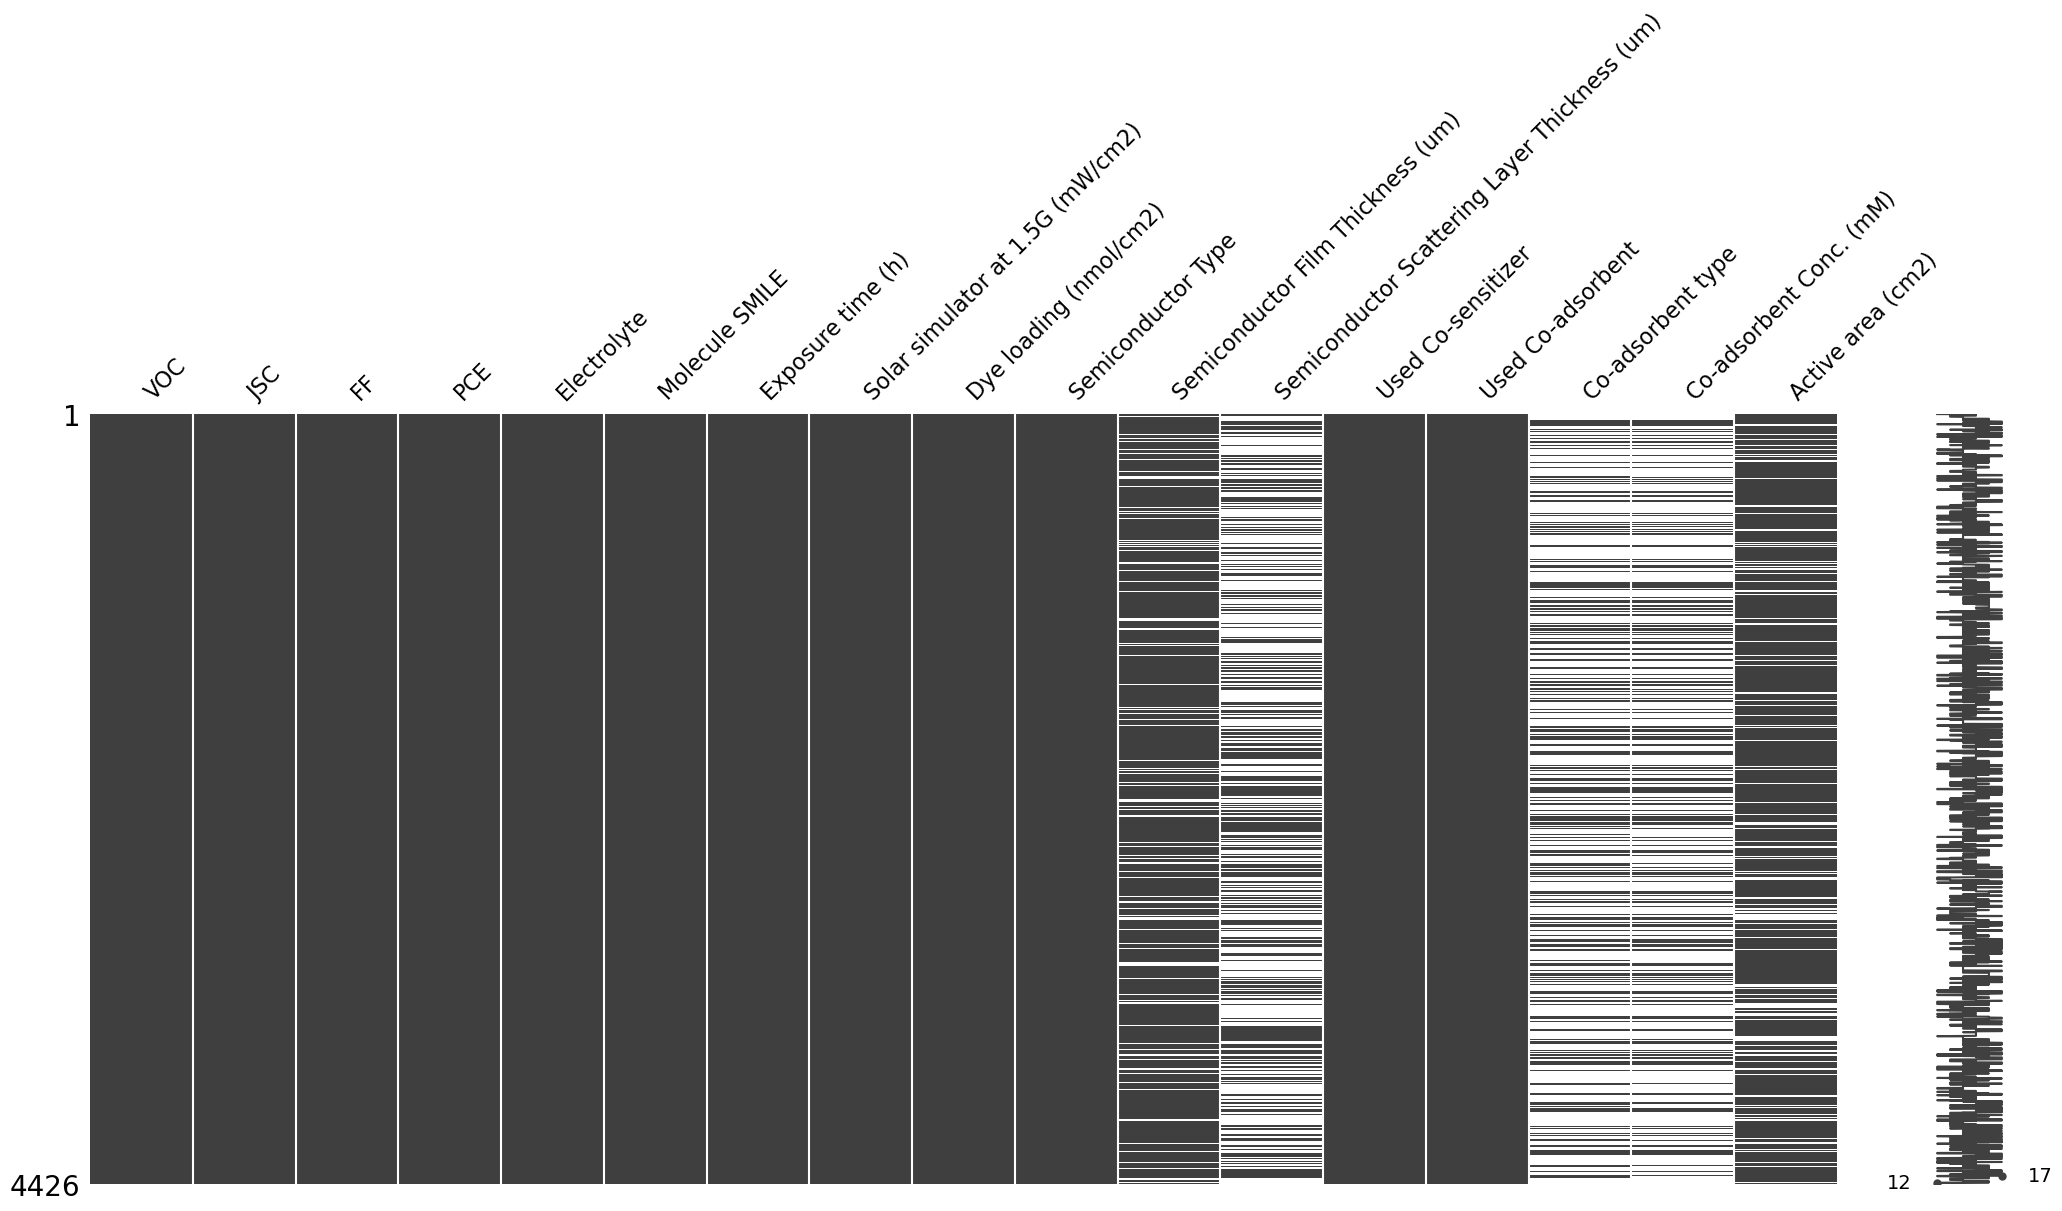

In [19]:
dsscdb["Dye loading (nmol/cm2)"].fillna(imputation_value, inplace=True)
msno.matrix(dsscdb)

In [20]:
dsscdb.groupby(["Semiconductor Type", "Semiconductor Film Thickness (um)", "Semiconductor Scattering Layer Thickness (um)"]).count().sort_values(by="PCE", ascending=False).head(10)

VOC  \
Semiconductor Type Semiconductor Film Thickness (um) Semiconductor Scattering Layer Thickness (um)        
TiO2               12.0                              4.0                                            402   
                                                     6.0                                            150   
                   10.0                              4.0                                            150   
                   12.0                              5.0                                            107   
                   8.0                               4.0                                            102   
                                                     5.0                                             73   
                   7.0                               5.0                                             60   
                   15.0                              5.0                                             52   
                   9.0                               5.0                                             50   
                   4.0                               3.0                                             44   

                                                                                                    JSC  \
Semiconductor Type Semiconductor Film Thickness (um) Semiconductor Scattering Layer Thickness (um)        
TiO2               12.0                              4.0                                            402   
                                                     6.0                                            150   
                   10.0                              4.0                                            150   
                   12.0                              5.0                                            107   
                   8.0                               4.0                                            102   
                                                     5.0                                             73   
                   7.0                               5.0                                             60   
                   15.0                              5.0                                             52   
                   9.0                               5.0                                             50   
                   4.0                               3.0                                             44   

                                                                                                     FF  \
Semiconductor Type Semiconductor Film Thickness (um) Semiconductor Scattering Layer Thickness (um)        
TiO2               12.0                              4.0                                            402   
                                                     6.0                                            150   
                   10.0                              4.0                                            150   
                   12.0                              5.0                                            107   
                   8.0                               4.0                                            102   
                                                     5.0                                             73   
                   7.0                               5.0                                             60   
                   15.0                              5.0                                             52   
                   9.0                               5.0                                             50   
                   4.0                               3.0                                             44   

                                                                                                    PCE  \
Semiconductor Type Semiconductor Film Thickness (um) Semiconductor Scattering Layer Thickness (um)        
TiO2               12.0        

<Axes: >

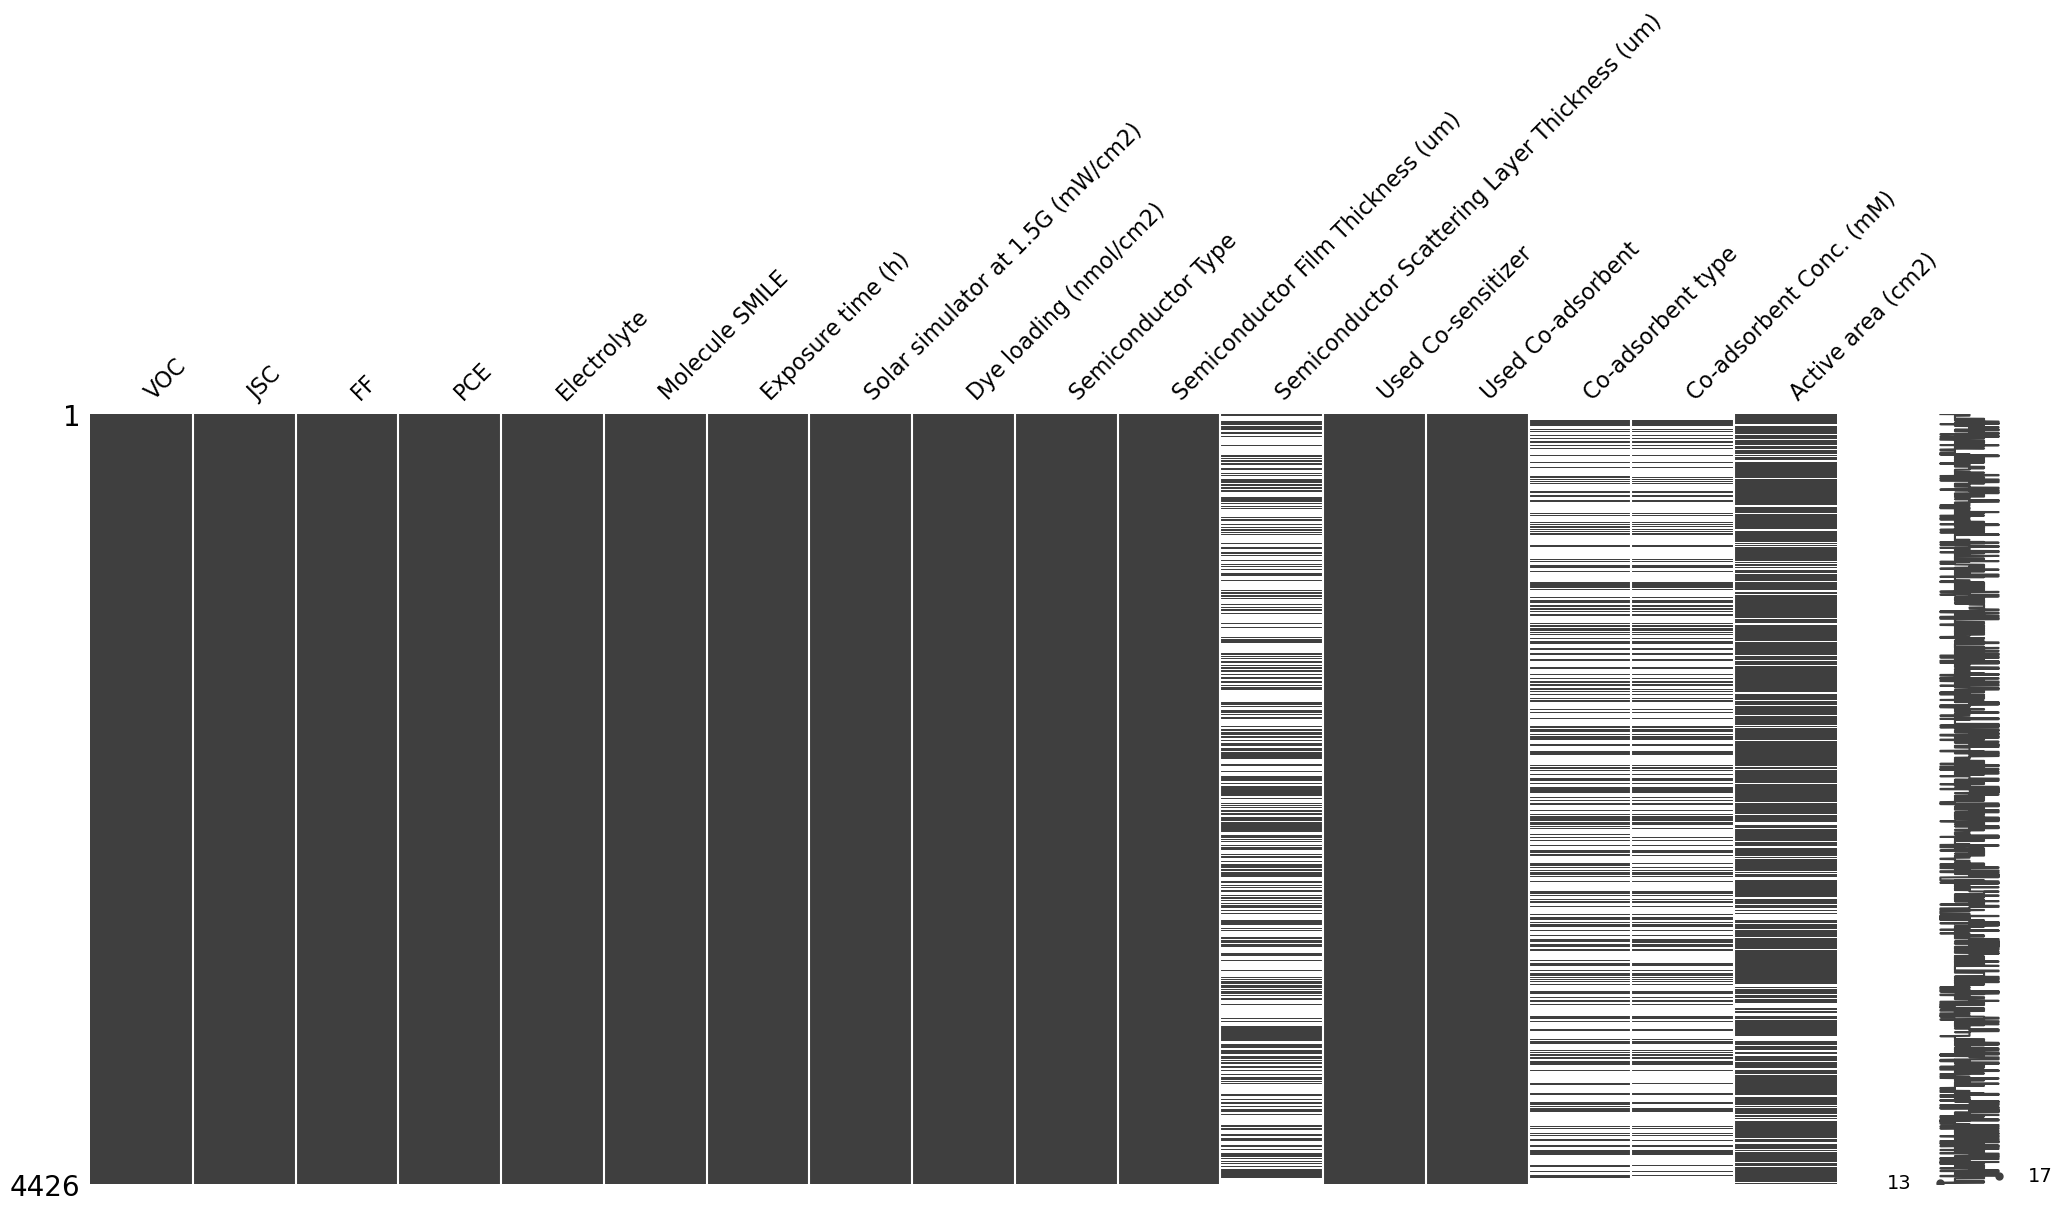

In [21]:
dsscdb["Semiconductor Film Thickness (um)"].fillna(12.0, inplace=True)
msno.matrix(dsscdb)

<Axes: >

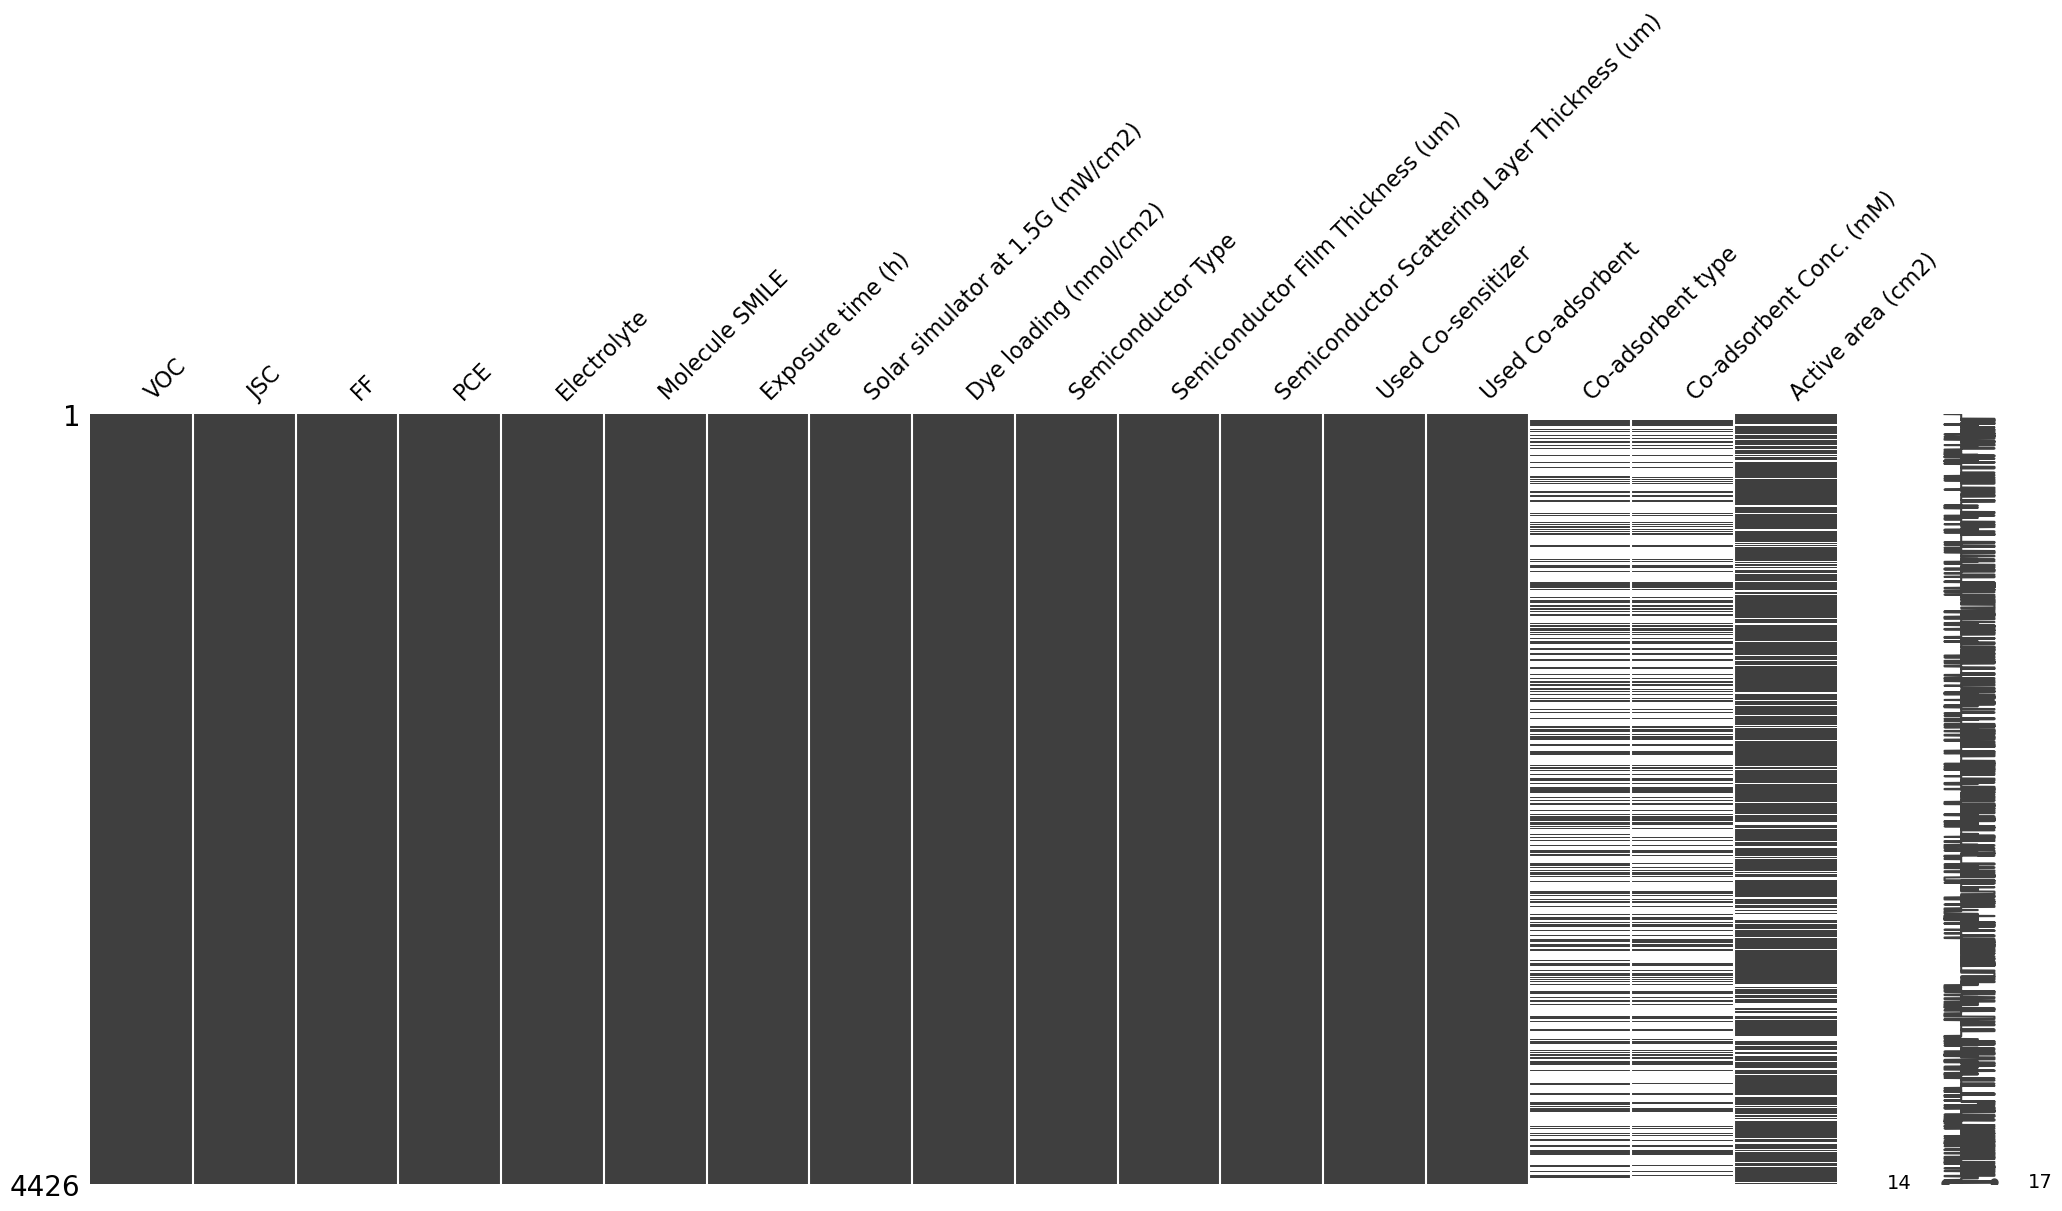

In [22]:
dsscdb["Semiconductor Scattering Layer Thickness (um)"].fillna(0.0, inplace=True)
msno.matrix(dsscdb)

In [23]:
dsscdb.loc[dsscdb["Used Co-adsorbent"] == 0, "Co-adsorbent Conc. (mM)"] = 0
dsscdb.loc[dsscdb["Used Co-adsorbent"] == 0, "Co-adsorbent type"] = "None"

In [24]:
dsscdb["Co-adsorbent type"].isna().sum()

6

<Axes: >

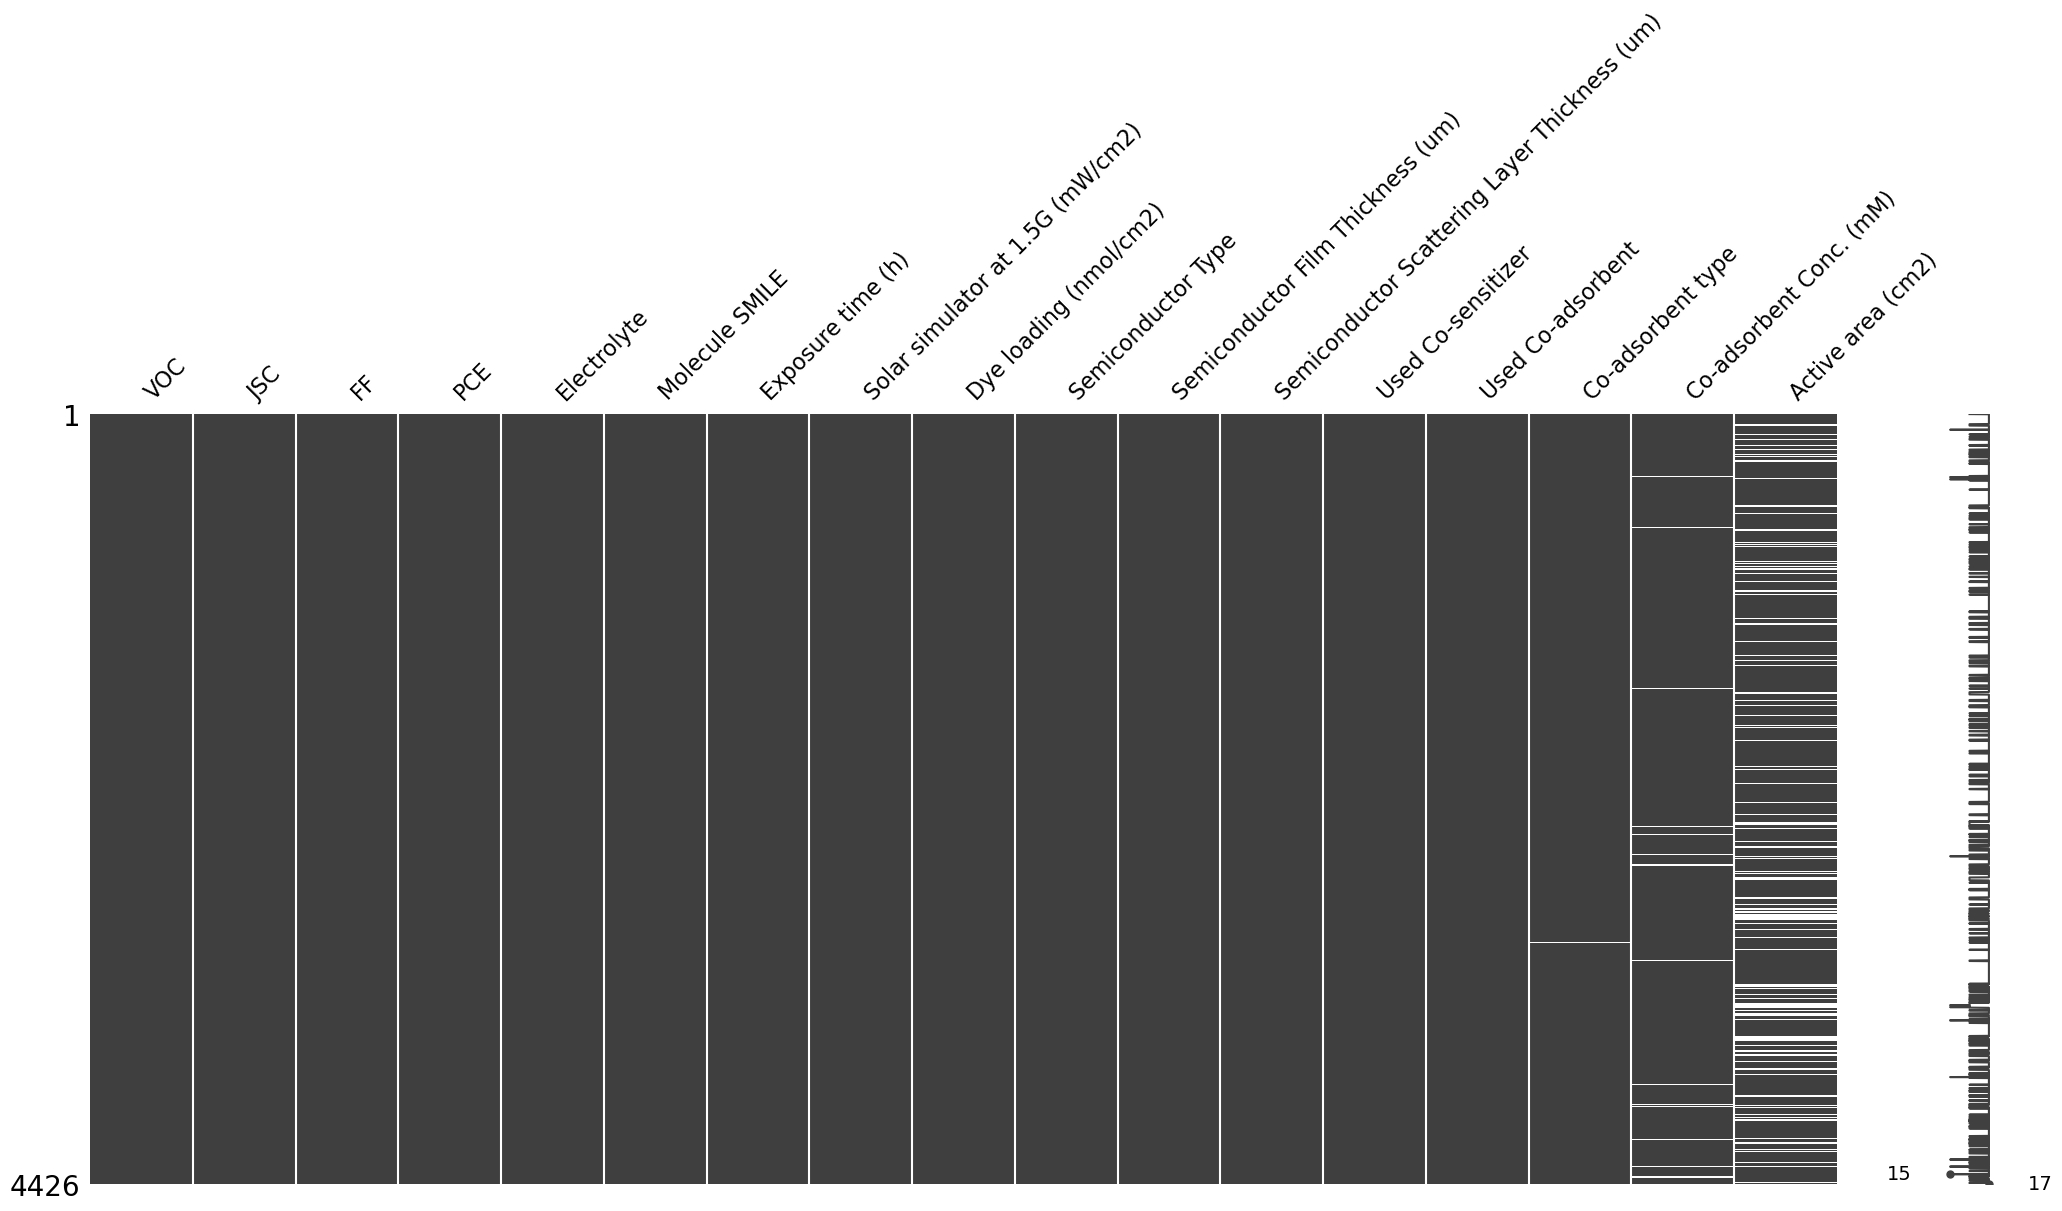

In [25]:
msno.matrix(dsscdb)

In [26]:
dsscdb.loc[dsscdb["Co-adsorbent type"].isna(), "Co-adsorbent type"] = "CDCA"

In [27]:
dsscdb["Co-adsorbent type"].isna().sum()

0

<Axes: >

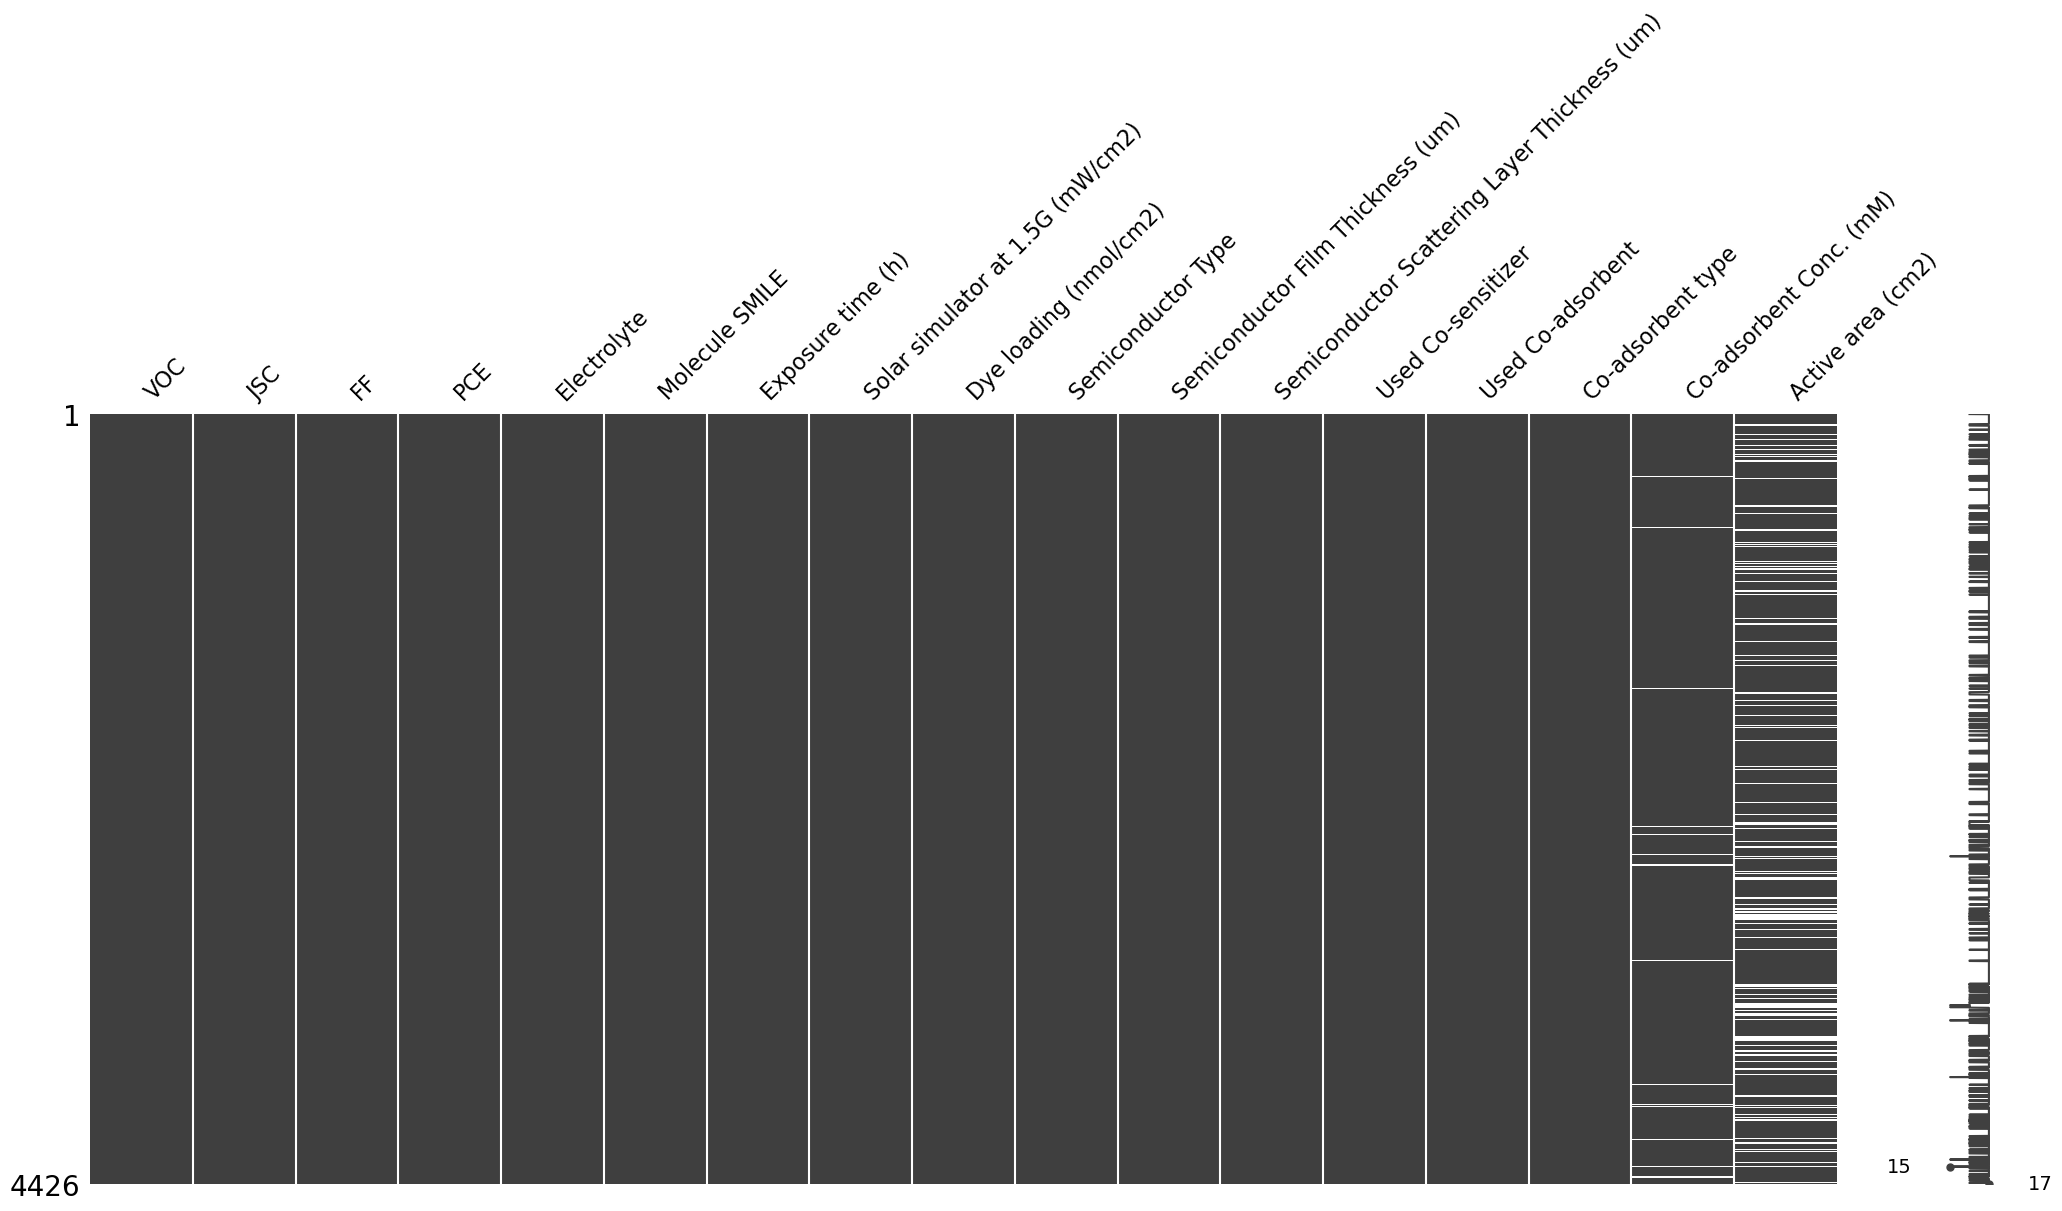

In [28]:
msno.matrix(dsscdb)

In [36]:
dsscdb.groupby("Co-adsorbent Conc. (mM)").count().sort_values(by="PCE", ascending=False).head(10)

,VOC,JSC,FF,PCE,Electrolyte,Molecule SMILE,Exposure time (h),Solar simulator at 1.5G (mW/cm2),Dye loading (nmol/cm2),Semiconductor Type,Semiconductor Film Thickness (um),Semiconductor Scattering Layer Thickness (um),Used Co-sensitizer,Used Co-adsorbent,Co-adsorbent type,Active area (cm2)
Co-adsorbent Conc. (mM),,,,,,,,,,,,,,,,
0.0,3012,3012,3012,3012,3012,3012,3012,3012,3012,3012,3012,3012,3012,3012,3012,2442
10.0,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249,202
1.0,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,157
5.0,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,157
2.0,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,119
20.0,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,76
0.3,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,54
0.4,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,55
3.0,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,37


In [42]:
conc = np.array(list(dsscdb.groupby("Co-adsorbent Conc. (mM)").count().sort_values(by="PCE", ascending=False).index[1:5]))
conc_freq = np.array(list(dsscdb.groupby("Co-adsorbent Conc. (mM)").count().sort_values(by="PCE", ascending=False).head(10)['VOC'])[1:5])

w_conc_freq = conc_freq / sum(conc_freq)

imputed_coad_conc = round(np.dot(conc, w_conc_freq), 2)
print(conc, conc_freq, w_conc_freq, imputed_coad_conc)


[10.  1.  5.  2.] [249 189 177 134] [0.33244326 0.25233645 0.23631509 0.17890521] 5.12


<Axes: xlabel='Used Co-sensitizer', ylabel='PCE'>

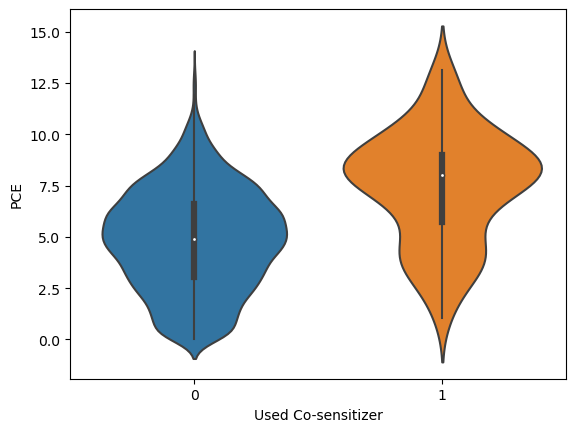

In [49]:
sns.violinplot(data=dsscdb, x="Used Co-sensitizer", y="PCE")

In [62]:
dsscdb.to_excel("checking_nan.xlsx")

<Axes: >

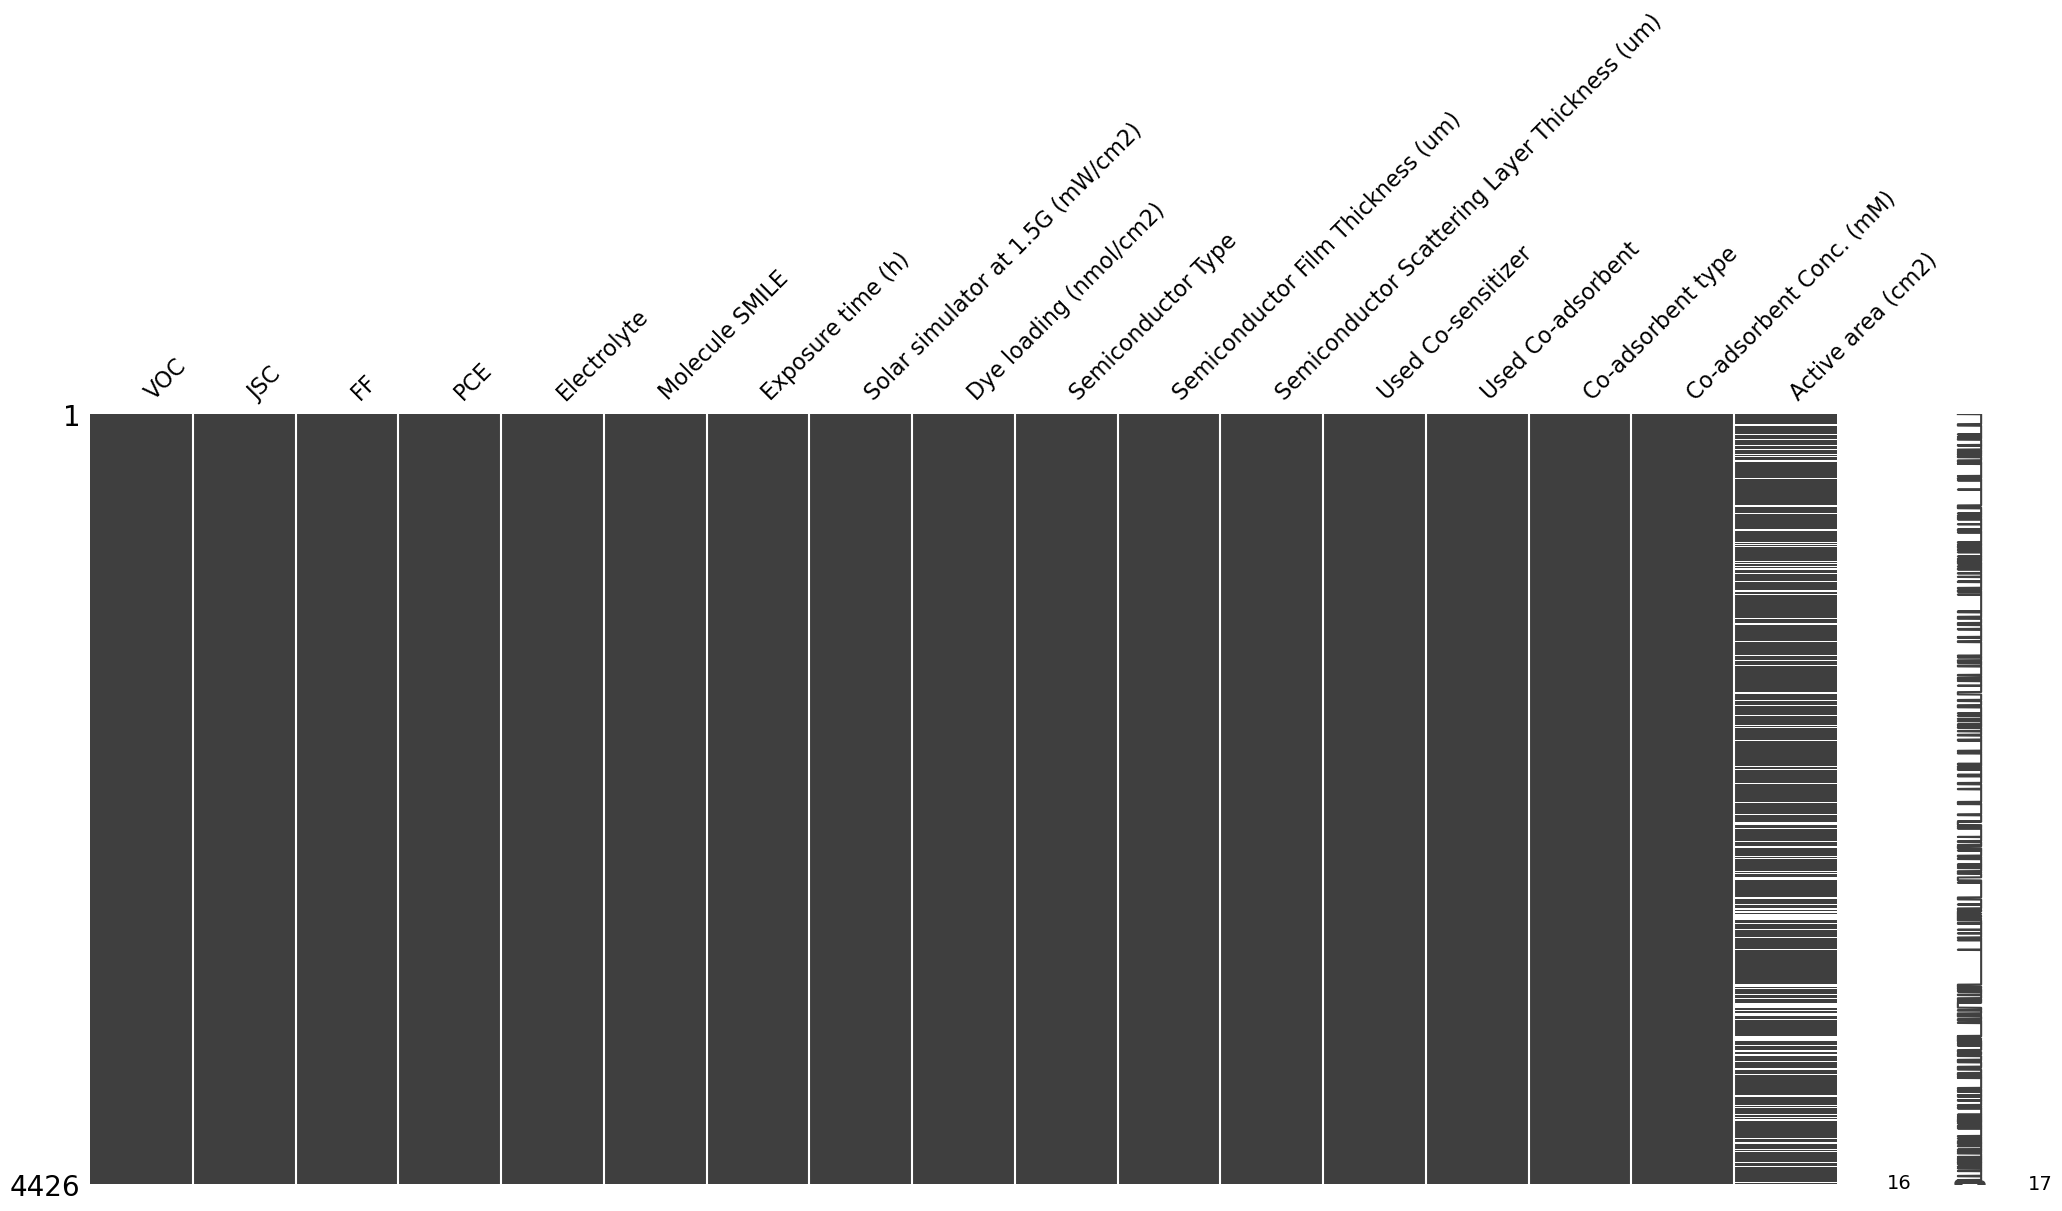

In [43]:
dsscdb["Co-adsorbent Conc. (mM)"].fillna(imputed_coad_conc, inplace=True)
msno.matrix(dsscdb)

<Axes: >

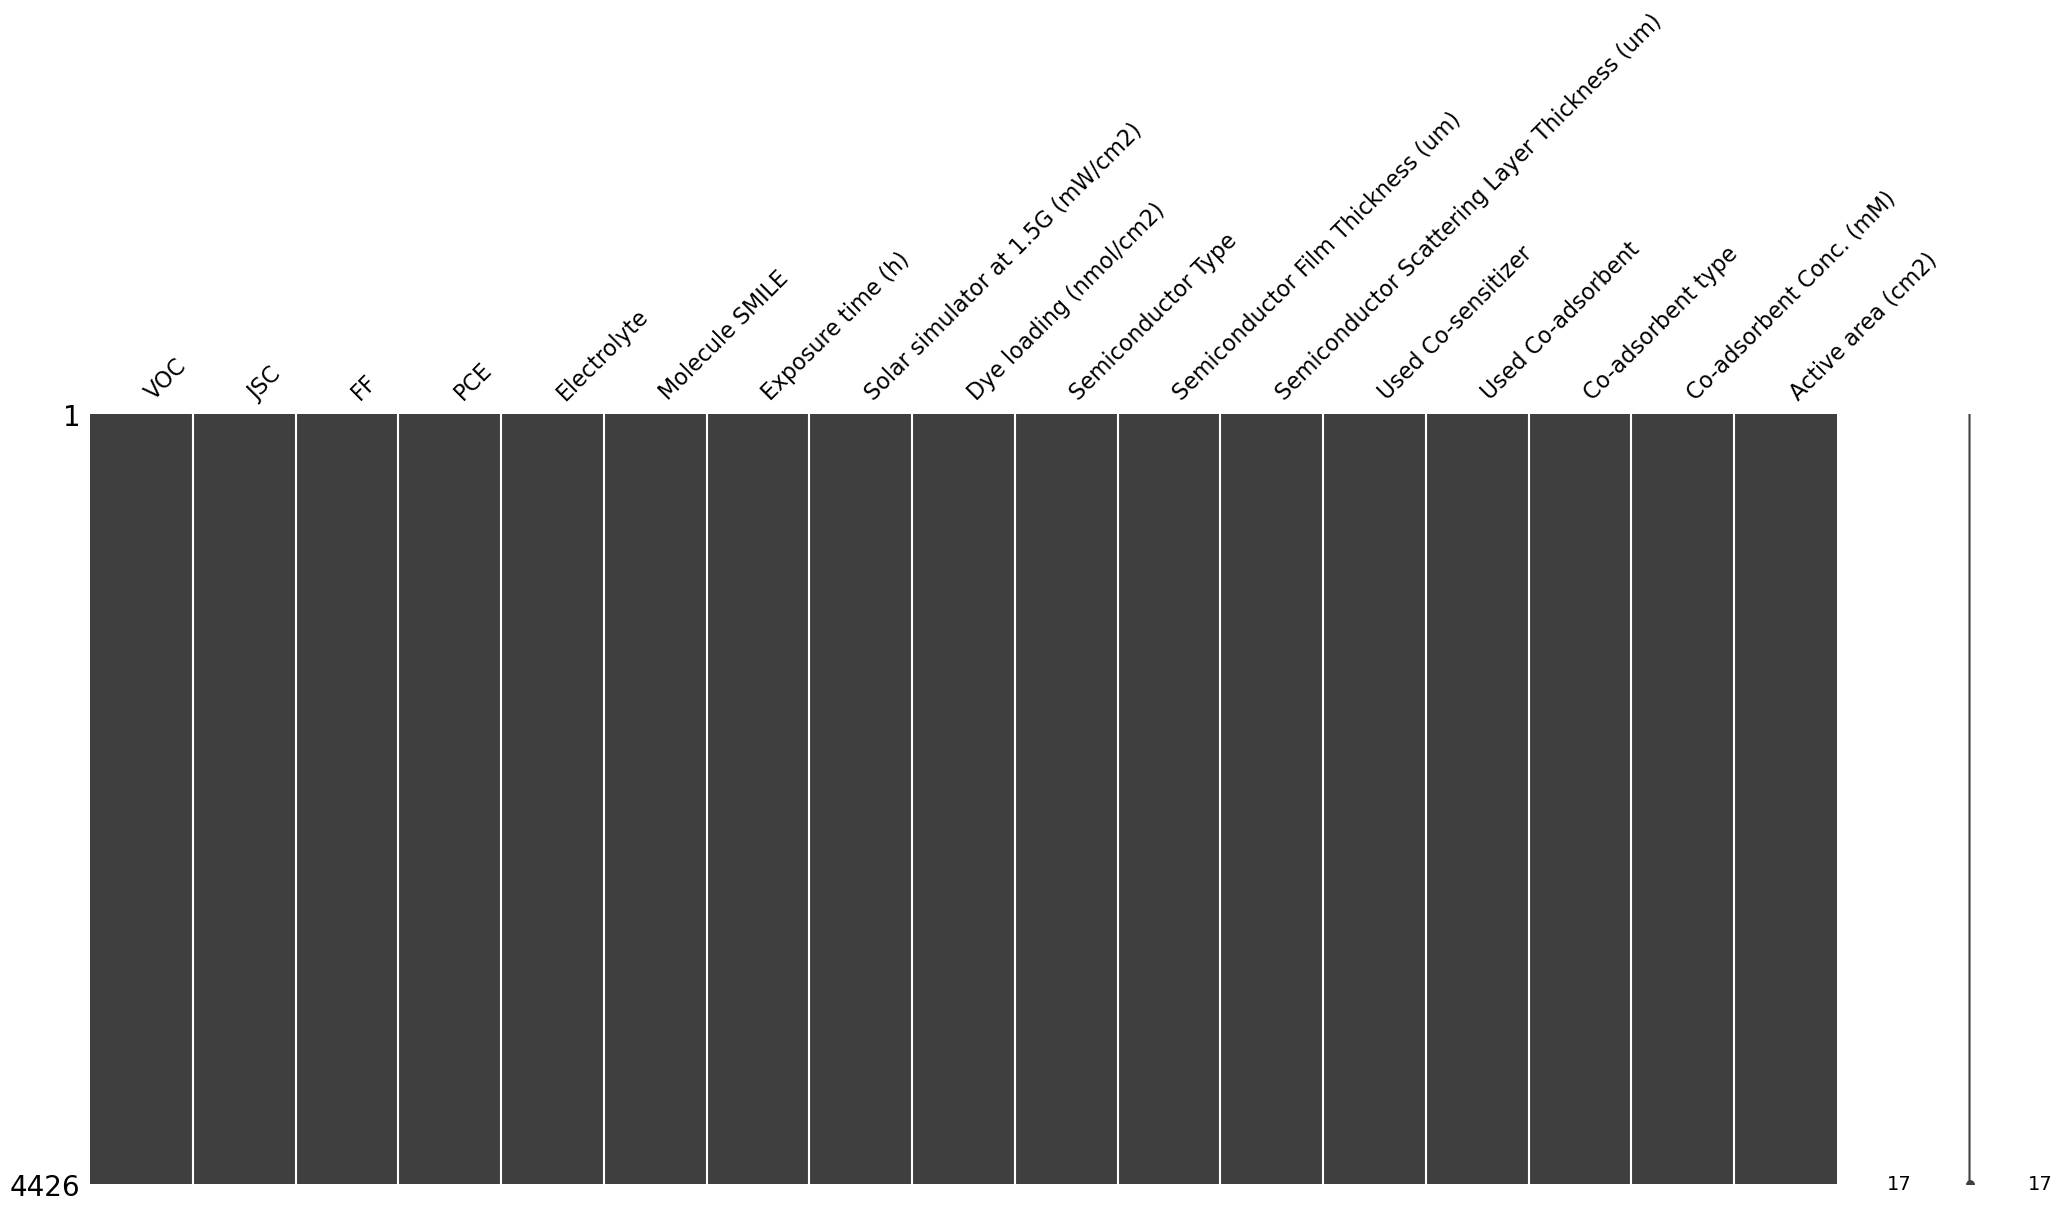

In [46]:
dsscdb["Active area (cm2)"].fillna(dsscdb["Active area (cm2)"].mode()[0], inplace=True)

msno.matrix(dsscdb)

C:\Users\clarkep\AppData\Local\Temp\ipykernel_42208\1561770812.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=dsscdb.corr(), annot=False, mask= np.triu(np.ones_like(dsscdb.corr(), dtype=bool)))


<Axes: >

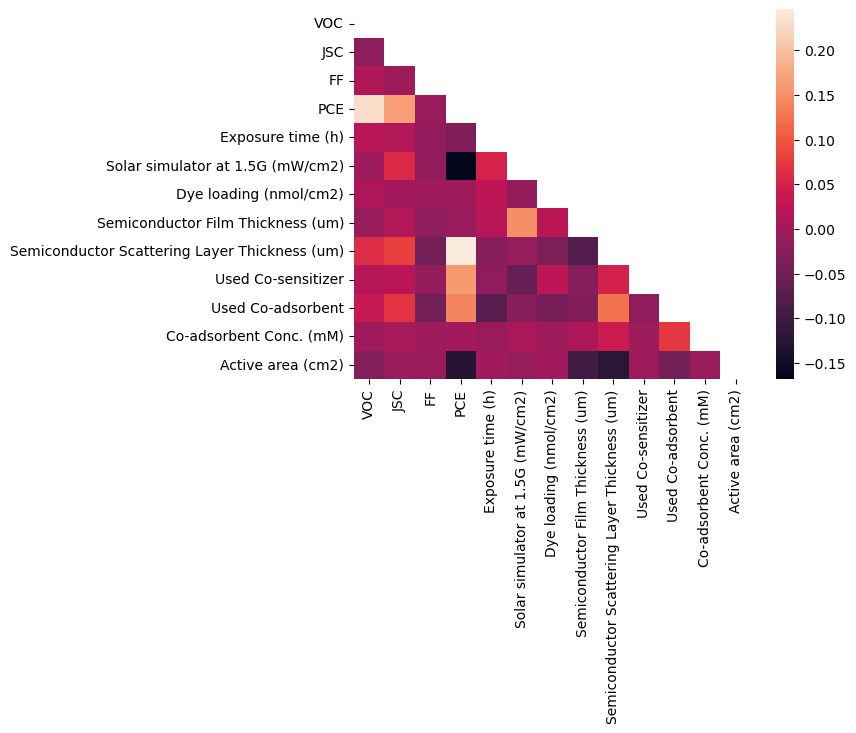

In [47]:
sns.heatmap(data=dsscdb.corr(), annot=False, mask= np.triu(np.ones_like(dsscdb.corr(), dtype=bool)))

In [5]:
dsscdb = pd.read_csv("imputed_dsscdb.csv", index_col=0)
dsscdb

,VOC,JSC,FF,PCE,Electrolyte,Molecule SMILE,Exposure time (h),Solar simulator at 1.5G (mW/cm2),Dye loading (nmol/cm2),Semiconductor Type,Semiconductor Film Thickness (um),Semiconductor Scattering Layer Thickness (um),Used Co-sensitizer,Used Co-adsorbent,Co-adsorbent type,Co-adsorbent Conc. (mM),Active area (cm2)
0,687.0,10.79,0.70,5.19,Iodide_Triiodide,N#C/C(=C\c1ccc(cc1)N(c1ccccc1)CCCCCCN1c2ccccc2...,15.0,100.0,152.64,TiO2,12.0,0.0,0,0,None,0.0,0.250
1,790.0,6.90,0.47,2.60,Spiro-OMeTAD,N#C/C(=C\c1ccc(s1)c1ccc(s1)c1ccc(cc1)N(c1ccc(c...,5.0,100.0,152.64,TiO2,8.0,5.0,0,0,None,0.0,0.158
2,835.0,7.70,0.49,3.10,Spiro-OMeTAD,N#C/C(=C\c1ccc(s1)c1ccc(cc1)N(c1ccc(cc1)/C=C/c...,5.0,100.0,152.64,TiO2,8.0,5.0,0,0,None,0.0,0.158
3,800.0,6.40,0.43,2.20,Spiro-OMeTAD,CCN(c1ccc2c(c1)oc(=O)c(c2)/C=C/c1ccc(cc1)N(c1c...,5.0,100.0,152.64,TiO2,8.0,5.0,0,0,None,0.0,0.158
4,651.0,10.30,0.75,5.00,Iodide_Triiodide,N#C/C(=C\c1ccc(s1)c1ccc(s1)c1ccc(cc1)N(c1ccc(c...,5.0,100.0,152.64,TiO2,8.0,5.0,0,0,None,0.0,0.158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,666.0,17.84,0.74,8.79,Iodide_Triiodide,S=C=N[Ru]12(N=C=S)(N3CCC(CC3C3N2CCC(C3)C(=O)[O...,24.0,100.0,152.64,TiO2,14.0,0.0,0,0,None,0.0,0.120
4422,651.0,9.93,0.70,4.52,Iodide_Triiodide,C(#N)/C(/C(=O)O)=C\C=1SC(=CC1)C=1C=CC=2N(C3=CC...,24.0,100.0,296.00,TiO2,14.0,0.0,0,0,None,0.0,0.120
4423,667.0,12.85,0.71,6.09,Iodide_Triiodide,CSC1=CC=C(C=C1)C=1C=C2SC=3C=C(C=CC3N(C2=CC1)CC...,24.0,100.0,224.00,TiO2,14.0,0.0,0,0,None,0.0,0.120
4424,659.0,12.46,0.69,5.65,Iodide_Triiodide,COC1=CC=C(C=C1)C=1C=C2SC=3C=C(C=CC3N(C2=CC1)CC...,24.0,100.0,187.00,TiO2,14.0,0.0,0,0,None,0.0,0.120
